In [8]:
from __future__ import division, print_function
from tensorflow.python.keras.layers.core import Dense
from tensorflow.python.keras.layers import Dense,BatchNormalization
from tensorflow.python.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import math
import os
import matplotlib.pyplot as plt


In [66]:
data = np.load('/home/chase/Boyka/Lyu/fac_cond256_unit8.npz')
raw_X=data['cond']
raw_X=np.squeeze(raw_X)
raw_X[0]
x_min=np.min(raw_X)
x_max=np.max(raw_X)
raw_Y=data['fac']
raw_Y=raw_Y.astype(np.float64)
y_min=[np.min(raw_Y[:,0]),np.min(raw_Y[:,1]),np.min(raw_Y[:,2])]
y_max=[np.max(raw_Y[:,0]),np.max(raw_Y[:,1]),np.max(raw_Y[:,2])]
# raw_X=(raw_X[:,0]-x_min)/(x_max-x_min)
raw_Y[:,0]=(raw_Y[:,0]-y_min[0])/(y_max[0]-y_min[0])
raw_Y[:,1]=(raw_Y[:,1]-y_min[1])/(y_max[1]-y_min[1])
raw_Y[:,2]=(raw_Y[:,2]-y_min[2])/(y_max[2]-y_min[2])
BATCH_SIZE = 256   
NUM_EPOCHS = 10000
Xtrain=raw_X[:-1000]
Ytrain=raw_Y[:-1000]
Xtest=raw_X[-1000:]
Ytest=raw_Y[-1000:]
print(y_max)
print(y_max[0]-y_min[0],y_max[1]-y_min[1],y_max[2]-y_min[2])

[4.999253, 0.849988, 0.029993]


In [25]:
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)
Xtrain[0],Ytrain[0]

(2000, 65) (1000, 65) (2000, 3) (1000, 3)


(array([0.      , 0.195109, 0.390114, 0.581551, 0.754668, 0.910086,
        1.05162 , 1.18103 , 1.29792 , 1.39992 , 1.48112 , 1.52438 ,
        1.49314 , 1.3968  , 1.29393 , 1.20968 , 1.14404 , 1.09076 ,
        1.04499 , 1.00543 , 0.971878, 0.943974, 0.921199, 0.902677,
        0.887477, 0.8748  , 0.86406 , 0.854744, 0.846565, 0.839307,
        0.832844, 0.827054, 0.821828, 0.817045, 0.812608, 0.808448,
        0.804538, 0.800849, 0.79735 , 0.794043, 0.790948, 0.787993,
        0.785137, 0.78243 , 0.779863, 0.777406, 0.774991, 0.772333,
        0.768828, 0.765023, 0.761571, 0.758508, 0.755777, 0.753328,
        0.75111 , 0.749084, 0.747228, 0.745512, 0.743922, 0.742449,
        0.741078, 0.7398  , 0.738601, 0.737473, 0.736409]),
 array([0.1312632 , 0.4585155 , 0.21886151]))

In [26]:
model = Sequential()
model.add(Dense(64,activation= 'relu',input_shape=(65,)))
model.add(BatchNormalization())
model.add(Dense(128,activation= 'relu'))
model.add(BatchNormalization())
model.add(Dense(256,activation= 'relu'))
model.add(BatchNormalization())
model.add(Dense(100,activation= 'relu'))
model.add(BatchNormalization())
model.add(Dense(3))
model.summary()

model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                4224      
_________________________________________________________________
batch_normalization_4 (Batch (None, 64)                256       
_________________________________________________________________
dense_6 (Dense)              (None, 128)               8320      
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)               512       
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
batch_normalization_6 (Batch (None, 256)               1024      
_________________________________________________________________
dense_8 (Dense)              (None, 100)              

In [27]:
history=model.fit(Xtrain, Ytrain, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=(Xtest, Ytest),shuffle=True)

score, _ = model.evaluate(Xtest, Ytest, batch_size=BATCH_SIZE)

model.save('data_norm_10000ep.h5')



Epoch 1/10000
8/8 [==============================] - 1s 27ms/step - loss: 0.7888 - mean_squared_error: 0.7888 - val_loss: 0.3078 - val_mean_squared_error: 0.3078
Epoch 2/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.2963 - mean_squared_error: 0.2963 - val_loss: 0.2681 - val_mean_squared_error: 0.2681
Epoch 3/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.1901 - mean_squared_error: 0.1901 - val_loss: 0.1985 - val_mean_squared_error: 0.1985
Epoch 4/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.1311 - mean_squared_error: 0.1311 - val_loss: 0.1574 - val_mean_squared_error: 0.1574
Epoch 5/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0962 - mean_squared_error: 0.0962 - val_loss: 0.1304 - val_mean_squared_error: 0.1304
Epoch 6/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0688 - mean_squared_error: 0.0688 - val_loss: 0.1142 - val_mean_squared_error: 0.1142
Epoch 7/10000
8/8 [=========

8/8 [==============================] - 0s 14ms/step - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.0476 - val_mean_squared_error: 0.0476
Epoch 102/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0150 - mean_squared_error: 0.0150 - val_loss: 0.0408 - val_mean_squared_error: 0.0408
Epoch 103/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0153 - mean_squared_error: 0.0153 - val_loss: 0.0739 - val_mean_squared_error: 0.0739
Epoch 104/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0147 - mean_squared_error: 0.0147 - val_loss: 0.0469 - val_mean_squared_error: 0.0469
Epoch 105/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.0762 - val_mean_squared_error: 0.0762
Epoch 106/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0843 - val_mean_squared_error: 0.0843
Epoch 107/10000
8/8 [===========

8/8 [==============================] - 0s 16ms/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0900 - val_mean_squared_error: 0.0900
Epoch 152/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0703 - val_mean_squared_error: 0.0703
Epoch 153/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0900 - val_mean_squared_error: 0.0900
Epoch 154/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0595 - val_mean_squared_error: 0.0595
Epoch 155/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 156/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0525 - val_mean_squared_error: 0.0525
Epoch 157/10000
8/8 [===========

8/8 [==============================] - 0s 15ms/step - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0938 - val_mean_squared_error: 0.0938
Epoch 202/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0478 - val_mean_squared_error: 0.0478
Epoch 203/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0652 - val_mean_squared_error: 0.0652
Epoch 204/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0884 - val_mean_squared_error: 0.0884
Epoch 205/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0584 - val_mean_squared_error: 0.0584
Epoch 206/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0607 - val_mean_squared_error: 0.0607
Epoch 207/10000
8/8 [===========

8/8 [==============================] - 0s 15ms/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.0500 - val_mean_squared_error: 0.0500
Epoch 252/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.0832 - val_mean_squared_error: 0.0832
Epoch 253/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.1315 - val_mean_squared_error: 0.1315
Epoch 254/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.1106 - val_mean_squared_error: 0.1106
Epoch 255/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.1240 - val_mean_squared_error: 0.1240
Epoch 256/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.1667 - val_mean_squared_error: 0.1667
Epoch 257/10000
8/8 [===========

8/8 [==============================] - 0s 15ms/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.4403 - val_mean_squared_error: 0.4403
Epoch 302/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.4836 - val_mean_squared_error: 0.4836
Epoch 303/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.3078 - val_mean_squared_error: 0.3078
Epoch 304/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2972 - val_mean_squared_error: 0.2972
Epoch 305/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.3115 - val_mean_squared_error: 0.3115
Epoch 306/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.1636 - val_mean_squared_error: 0.1636
Epoch 307/10000
8/8 [===========

8/8 [==============================] - 0s 14ms/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.1554 - val_mean_squared_error: 0.1554
Epoch 352/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0751 - val_mean_squared_error: 0.0751
Epoch 353/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0578 - val_mean_squared_error: 0.0578
Epoch 354/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.1387 - val_mean_squared_error: 0.1387
Epoch 355/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.1026 - val_mean_squared_error: 0.1026
Epoch 356/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.1627 - val_mean_squared_error: 0.1627
Epoch 357/10000
8/8 [===========

8/8 [==============================] - 0s 15ms/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0477 - val_mean_squared_error: 0.0477
Epoch 402/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0998 - val_mean_squared_error: 0.0998
Epoch 403/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0942 - val_mean_squared_error: 0.0942
Epoch 404/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0550 - val_mean_squared_error: 0.0550
Epoch 405/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.1535 - val_mean_squared_error: 0.1535
Epoch 406/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.1145 - val_mean_squared_error: 0.1145
Epoch 407/10000
8/8 [===========

8/8 [==============================] - 0s 15ms/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.1095 - val_mean_squared_error: 0.1095
Epoch 452/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.1111 - val_mean_squared_error: 0.1111
Epoch 453/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.1472 - val_mean_squared_error: 0.1472
Epoch 454/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0399 - val_mean_squared_error: 0.0399
Epoch 455/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0832 - val_mean_squared_error: 0.0832
Epoch 456/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0271 - val_mean_squared_error: 0.0271
Epoch 457/10000
8/8 [===========

8/8 [==============================] - 0s 15ms/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0896 - val_mean_squared_error: 0.0896
Epoch 502/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.1025 - val_mean_squared_error: 0.1025
Epoch 503/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0975 - val_mean_squared_error: 0.0975
Epoch 504/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0711 - val_mean_squared_error: 0.0711
Epoch 505/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.1173 - val_mean_squared_error: 0.1173
Epoch 506/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.1526 - val_mean_squared_error: 0.1526
Epoch 507/10000
8/8 [===========

8/8 [==============================] - 0s 15ms/step - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.1188 - val_mean_squared_error: 0.1188
Epoch 552/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0787 - val_mean_squared_error: 0.0787
Epoch 553/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0662 - val_mean_squared_error: 0.0662
Epoch 554/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0427 - val_mean_squared_error: 0.0427
Epoch 555/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.1157 - val_mean_squared_error: 0.1157
Epoch 556/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.1469 - val_mean_squared_error: 0.1469
Epoch 557/10000
8/8 [===========

8/8 [==============================] - 0s 15ms/step - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0840 - val_mean_squared_error: 0.0840
Epoch 602/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0330 - val_mean_squared_error: 0.0330
Epoch 603/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.1450 - val_mean_squared_error: 0.1450
Epoch 604/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.1087 - val_mean_squared_error: 0.1087
Epoch 605/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0990 - val_mean_squared_error: 0.0990
Epoch 606/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0828 - val_mean_squared_error: 0.0828
Epoch 607/10000
8/8 [===========

8/8 [==============================] - 0s 14ms/step - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0587 - val_mean_squared_error: 0.0587
Epoch 652/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0417 - val_mean_squared_error: 0.0417
Epoch 653/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0657 - val_mean_squared_error: 0.0657
Epoch 654/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0586 - val_mean_squared_error: 0.0586
Epoch 655/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0479 - val_mean_squared_error: 0.0479
Epoch 656/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0797 - val_mean_squared_error: 0.0797
Epoch 657/10000
8/8 [===========

8/8 [==============================] - 0s 15ms/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0513 - val_mean_squared_error: 0.0513
Epoch 702/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0719 - val_mean_squared_error: 0.0719
Epoch 703/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0908 - val_mean_squared_error: 0.0908
Epoch 704/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.1079 - val_mean_squared_error: 0.1079
Epoch 705/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0495 - val_mean_squared_error: 0.0495
Epoch 706/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0553 - val_mean_squared_error: 0.0553
Epoch 707/10000
8/8 [===========

8/8 [==============================] - 0s 15ms/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0577 - val_mean_squared_error: 0.0577
Epoch 752/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.1621 - val_mean_squared_error: 0.1621
Epoch 753/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 754/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0393 - val_mean_squared_error: 0.0393
Epoch 755/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0731 - val_mean_squared_error: 0.0731
Epoch 756/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0414 - val_mean_squared_error: 0.0414
Epoch 757/10000
8/8 [===========

8/8 [==============================] - 0s 15ms/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.1001 - val_mean_squared_error: 0.1001
Epoch 802/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.1086 - val_mean_squared_error: 0.1086
Epoch 803/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.1066 - val_mean_squared_error: 0.1066
Epoch 804/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0537 - val_mean_squared_error: 0.0537
Epoch 805/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0897 - val_mean_squared_error: 0.0897
Epoch 806/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.1392 - val_mean_squared_error: 0.1392
Epoch 807/10000
8/8 [===========

8/8 [==============================] - 0s 14ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.1255 - val_mean_squared_error: 0.1255
Epoch 852/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.1016 - val_mean_squared_error: 0.1016
Epoch 853/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0319 - val_mean_squared_error: 0.0319
Epoch 854/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0360 - val_mean_squared_error: 0.0360
Epoch 855/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0764 - val_mean_squared_error: 0.0764
Epoch 856/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0637 - val_mean_squared_error: 0.0637
Epoch 857/10000
8/8 [===========

8/8 [==============================] - 0s 15ms/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0662 - val_mean_squared_error: 0.0662
Epoch 902/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0445 - val_mean_squared_error: 0.0445
Epoch 903/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0784 - val_mean_squared_error: 0.0784
Epoch 904/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.1123 - val_mean_squared_error: 0.1123
Epoch 905/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.1152 - val_mean_squared_error: 0.1152
Epoch 906/10000
8/8 [==============================] - 0s 20ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0836 - val_mean_squared_error: 0.0836
Epoch 907/10000
8/8 [===========

8/8 [==============================] - 0s 15ms/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.1326 - val_mean_squared_error: 0.1326
Epoch 952/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0535 - val_mean_squared_error: 0.0535
Epoch 953/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0863 - val_mean_squared_error: 0.0863
Epoch 954/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.1127 - val_mean_squared_error: 0.1127
Epoch 955/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0743 - val_mean_squared_error: 0.0743
Epoch 956/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0600 - val_mean_squared_error: 0.0600
Epoch 957/10000
8/8 [===========

8/8 [==============================] - 0s 15ms/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0371 - val_mean_squared_error: 0.0371
Epoch 1002/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.1434 - val_mean_squared_error: 0.1434
Epoch 1003/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0462 - val_mean_squared_error: 0.0462
Epoch 1004/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0517 - val_mean_squared_error: 0.0517
Epoch 1005/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0575 - val_mean_squared_error: 0.0575
Epoch 1006/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0772 - val_mean_squared_error: 0.0772
Epoch 1007/10000
8/8 [=====

Epoch 1051/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0684 - val_mean_squared_error: 0.0684
Epoch 1052/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0686 - val_mean_squared_error: 0.0686
Epoch 1053/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0444 - val_mean_squared_error: 0.0444
Epoch 1054/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.1010 - val_mean_squared_error: 0.1010
Epoch 1055/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0431 - val_mean_squared_error: 0.0431
Epoch 1056/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0494 - val_mean_squared_error: 0.0494
Epoch 1057

Epoch 1101/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0530 - val_mean_squared_error: 0.0530
Epoch 1102/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0846 - val_mean_squared_error: 0.0846
Epoch 1103/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0937 - val_mean_squared_error: 0.0937
Epoch 1104/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0643 - val_mean_squared_error: 0.0643
Epoch 1105/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0538 - val_mean_squared_error: 0.0538
Epoch 1106/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.1182 - val_mean_squared_error: 0.1182
Epoch 1107

Epoch 1151/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0593 - val_mean_squared_error: 0.0593
Epoch 1152/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.1026 - val_mean_squared_error: 0.1026
Epoch 1153/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0580 - val_mean_squared_error: 0.0580
Epoch 1154/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0953 - val_mean_squared_error: 0.0953
Epoch 1155/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0379 - val_mean_squared_error: 0.0379
Epoch 1156/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 1157

Epoch 1201/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0360 - val_mean_squared_error: 0.0360
Epoch 1202/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0950 - val_mean_squared_error: 0.0950
Epoch 1203/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0491 - val_mean_squared_error: 0.0491
Epoch 1204/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.2342 - val_mean_squared_error: 0.2342
Epoch 1205/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.1769 - val_mean_squared_error: 0.1769
Epoch 1206/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.1415 - val_mean_squared_error: 0.1415
Epoch 1207

Epoch 1251/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.1094 - val_mean_squared_error: 0.1094
Epoch 1252/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0802 - val_mean_squared_error: 0.0802
Epoch 1253/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0440 - val_mean_squared_error: 0.0440
Epoch 1254/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0684 - val_mean_squared_error: 0.0684
Epoch 1255/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.1155 - val_mean_squared_error: 0.1155
Epoch 1256/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 1257

Epoch 1301/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.1138 - val_mean_squared_error: 0.1138
Epoch 1302/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0737 - val_mean_squared_error: 0.0737
Epoch 1303/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.1004 - val_mean_squared_error: 0.1004
Epoch 1304/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0620 - val_mean_squared_error: 0.0620
Epoch 1305/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0768 - val_mean_squared_error: 0.0768
Epoch 1306/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.1333 - val_mean_squared_error: 0.1333
Epoch 1307

Epoch 1351/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0800 - val_mean_squared_error: 0.0800
Epoch 1352/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.1368 - val_mean_squared_error: 0.1368
Epoch 1353/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0767 - val_mean_squared_error: 0.0767
Epoch 1354/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.1871 - val_mean_squared_error: 0.1871
Epoch 1355/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0586 - val_mean_squared_error: 0.0586
Epoch 1356/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0522 - val_mean_squared_error: 0.0522
Epoch 1357

Epoch 1401/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.1246 - val_mean_squared_error: 0.1246
Epoch 1402/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.2044 - val_mean_squared_error: 0.2044
Epoch 1403/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0938 - val_mean_squared_error: 0.0938
Epoch 1404/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0624 - val_mean_squared_error: 0.0624
Epoch 1405/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.1020 - val_mean_squared_error: 0.1020
Epoch 1406/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0738 - val_mean_squared_error: 0.0738
Epoch 1407

Epoch 1451/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0574 - val_mean_squared_error: 0.0574
Epoch 1452/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0914 - val_mean_squared_error: 0.0914
Epoch 1453/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0406 - val_mean_squared_error: 0.0406
Epoch 1454/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0555 - val_mean_squared_error: 0.0555
Epoch 1455/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.1346 - val_mean_squared_error: 0.1346
Epoch 1456/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0423 - val_mean_squared_error: 0.0423
Epoch 1457

Epoch 1501/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.1404 - val_mean_squared_error: 0.1404
Epoch 1502/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0838 - val_mean_squared_error: 0.0838
Epoch 1503/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.1871 - val_mean_squared_error: 0.1871
Epoch 1504/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.2258 - val_mean_squared_error: 0.2258
Epoch 1505/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.1697 - val_mean_squared_error: 0.1697
Epoch 1506/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.1811 - val_mean_squared_error: 0.1811
Epoch 1507

Epoch 1551/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0769 - val_mean_squared_error: 0.0769
Epoch 1552/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0517 - val_mean_squared_error: 0.0517
Epoch 1553/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.1081 - val_mean_squared_error: 0.1081
Epoch 1554/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0605 - val_mean_squared_error: 0.0605
Epoch 1555/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0623 - val_mean_squared_error: 0.0623
Epoch 1556/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0425 - val_mean_squared_error: 0.0425
Epoch 1557

Epoch 1601/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0470 - val_mean_squared_error: 0.0470
Epoch 1602/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0872 - val_mean_squared_error: 0.0872
Epoch 1603/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0481 - val_mean_squared_error: 0.0481
Epoch 1604/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0606 - val_mean_squared_error: 0.0606
Epoch 1605/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0795 - val_mean_squared_error: 0.0795
Epoch 1606/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0543 - val_mean_squared_error: 0.0543
Epoch 1607

Epoch 1651/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.1290 - val_mean_squared_error: 0.1290
Epoch 1652/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.1060 - val_mean_squared_error: 0.1060
Epoch 1653/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0386 - val_mean_squared_error: 0.0386
Epoch 1654/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0377 - val_mean_squared_error: 0.0377
Epoch 1655/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0882 - val_mean_squared_error: 0.0882
Epoch 1656/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0530 - val_mean_squared_error: 0.0530
Epoch 1657

Epoch 1701/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0665 - val_mean_squared_error: 0.0665
Epoch 1702/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.1177 - val_mean_squared_error: 0.1177
Epoch 1703/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0406 - val_mean_squared_error: 0.0406
Epoch 1704/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0522 - val_mean_squared_error: 0.0522
Epoch 1705/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0794 - val_mean_squared_error: 0.0794
Epoch 1706/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0385 - val_mean_squared_error: 0.0385
Epoch 1707

Epoch 1751/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0945 - val_mean_squared_error: 0.0945
Epoch 1752/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0380 - val_mean_squared_error: 0.0380
Epoch 1753/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0547 - val_mean_squared_error: 0.0547
Epoch 1754/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 1755/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.1111 - val_mean_squared_error: 0.1111
Epoch 1756/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0949 - val_mean_squared_error: 0.0949
Epoch 1757

Epoch 1801/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.1024 - val_mean_squared_error: 0.1024
Epoch 1802/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.1753 - val_mean_squared_error: 0.1753
Epoch 1803/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0533 - val_mean_squared_error: 0.0533
Epoch 1804/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0757 - val_mean_squared_error: 0.0757
Epoch 1805/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0915 - val_mean_squared_error: 0.0915
Epoch 1806/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0464 - val_mean_squared_error: 0.0464
Epoch 1807

Epoch 1851/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0619 - val_mean_squared_error: 0.0619
Epoch 1852/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.1056 - val_mean_squared_error: 0.1056
Epoch 1853/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0888 - val_mean_squared_error: 0.0888
Epoch 1854/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0962 - val_mean_squared_error: 0.0962
Epoch 1855/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.1086 - val_mean_squared_error: 0.1086
Epoch 1856/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.1572 - val_mean_squared_error: 0.1572
Epoch 1857

Epoch 1901/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0376 - val_mean_squared_error: 0.0376
Epoch 1902/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0621 - val_mean_squared_error: 0.0621
Epoch 1903/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.2166 - val_mean_squared_error: 0.2166
Epoch 1904/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0698 - val_mean_squared_error: 0.0698
Epoch 1905/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0517 - val_mean_squared_error: 0.0517
Epoch 1906/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.1550 - val_mean_squared_error: 0.1550
Epoch 1907

Epoch 1951/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0813 - val_mean_squared_error: 0.0813
Epoch 1952/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0631 - val_mean_squared_error: 0.0631
Epoch 1953/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0387 - val_mean_squared_error: 0.0387
Epoch 1954/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0693 - val_mean_squared_error: 0.0693
Epoch 1955/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.1010 - val_mean_squared_error: 0.1010
Epoch 1956/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0479 - val_mean_squared_error: 0.0479
Epoch 1957

Epoch 2001/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 2002/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0536 - val_mean_squared_error: 0.0536
Epoch 2003/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0706 - val_mean_squared_error: 0.0706
Epoch 2004/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0565 - val_mean_squared_error: 0.0565
Epoch 2005/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0949 - val_mean_squared_error: 0.0949
Epoch 2006/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0476 - val_mean_squared_error: 0.0476
Epoch 2007

Epoch 2051/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.1245 - val_mean_squared_error: 0.1245
Epoch 2052/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0618 - val_mean_squared_error: 0.0618
Epoch 2053/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0628 - val_mean_squared_error: 0.0628
Epoch 2054/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0283 - val_mean_squared_error: 0.0283
Epoch 2055/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0572 - val_mean_squared_error: 0.0572
Epoch 2056/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0638 - val_mean_squared_error: 0.0638
Epoch 2057

Epoch 2101/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0473 - val_mean_squared_error: 0.0473
Epoch 2102/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0608 - val_mean_squared_error: 0.0608
Epoch 2103/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0790 - val_mean_squared_error: 0.0790
Epoch 2104/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0381 - val_mean_squared_error: 0.0381
Epoch 2105/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0471 - val_mean_squared_error: 0.0471
Epoch 2106/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0590 - val_mean_squared_error: 0.0590
Epoch 2107

Epoch 2151/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0578 - val_mean_squared_error: 0.0578
Epoch 2152/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0460 - val_mean_squared_error: 0.0460
Epoch 2153/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0831 - val_mean_squared_error: 0.0831
Epoch 2154/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.1236 - val_mean_squared_error: 0.1236
Epoch 2155/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0339 - val_mean_squared_error: 0.0339
Epoch 2156/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.1164 - val_mean_squared_error: 0.1164
Epoch 2157

Epoch 2201/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0742 - val_mean_squared_error: 0.0742
Epoch 2202/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0605 - val_mean_squared_error: 0.0605
Epoch 2203/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0459 - val_mean_squared_error: 0.0459
Epoch 2204/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.1050 - val_mean_squared_error: 0.1050
Epoch 2205/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0769 - val_mean_squared_error: 0.0769
Epoch 2206/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0412 - val_mean_squared_error: 0.0412
Epoch 2207

Epoch 2251/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0708 - val_mean_squared_error: 0.0708
Epoch 2252/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0637 - val_mean_squared_error: 0.0637
Epoch 2253/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0458 - val_mean_squared_error: 0.0458
Epoch 2254/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0390 - val_mean_squared_error: 0.0390
Epoch 2255/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0846 - val_mean_squared_error: 0.0846
Epoch 2256/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.1270 - val_mean_squared_error: 0.1270
Epoch 2257

Epoch 2301/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0746 - val_mean_squared_error: 0.0746
Epoch 2302/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0628 - val_mean_squared_error: 0.0628
Epoch 2303/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0310 - val_mean_squared_error: 0.0310
Epoch 2304/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0703 - val_mean_squared_error: 0.0703
Epoch 2305/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0867 - val_mean_squared_error: 0.0867
Epoch 2306/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.2125 - val_mean_squared_error: 0.2125
Epoch 2307

Epoch 2351/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0414 - val_mean_squared_error: 0.0414
Epoch 2352/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0336 - val_mean_squared_error: 0.0336
Epoch 2353/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0665 - val_mean_squared_error: 0.0665
Epoch 2354/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0773 - val_mean_squared_error: 0.0773
Epoch 2355/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0500 - val_mean_squared_error: 0.0500
Epoch 2356/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0456 - val_mean_squared_error: 0.0456
Epoch 2357

Epoch 2401/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0502 - val_mean_squared_error: 0.0502
Epoch 2402/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0750 - val_mean_squared_error: 0.0750
Epoch 2403/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0477 - val_mean_squared_error: 0.0477
Epoch 2404/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0544 - val_mean_squared_error: 0.0544
Epoch 2405/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0414 - val_mean_squared_error: 0.0414
Epoch 2406/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0576 - val_mean_squared_error: 0.0576
Epoch 2407

Epoch 2451/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0540 - val_mean_squared_error: 0.0540
Epoch 2452/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0385 - val_mean_squared_error: 0.0385
Epoch 2453/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0352 - val_mean_squared_error: 0.0352
Epoch 2454/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.1095 - val_mean_squared_error: 0.1095
Epoch 2455/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0392 - val_mean_squared_error: 0.0392
Epoch 2456/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.1543 - val_mean_squared_error: 0.1543
Epoch 2457

Epoch 2501/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0448 - val_mean_squared_error: 0.0448
Epoch 2502/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.1146 - val_mean_squared_error: 0.1146
Epoch 2503/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 2504/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0374 - val_mean_squared_error: 0.0374
Epoch 2505/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0414 - val_mean_squared_error: 0.0414
Epoch 2506/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0330 - val_mean_squared_error: 0.0330
Epoch 2507

Epoch 2551/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0575 - val_mean_squared_error: 0.0575
Epoch 2552/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0492 - val_mean_squared_error: 0.0492
Epoch 2553/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0578 - val_mean_squared_error: 0.0578
Epoch 2554/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0706 - val_mean_squared_error: 0.0706
Epoch 2555/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0757 - val_mean_squared_error: 0.0757
Epoch 2556/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0398 - val_mean_squared_error: 0.0398
Epoch 2557

Epoch 2601/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.2928 - val_mean_squared_error: 0.2928
Epoch 2602/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0368 - val_mean_squared_error: 0.0368
Epoch 2603/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0945 - val_mean_squared_error: 0.0945
Epoch 2604/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0564 - val_mean_squared_error: 0.0564
Epoch 2605/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0525 - val_mean_squared_error: 0.0525
Epoch 2606/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0338 - val_mean_squared_error: 0.0338
Epoch 2607

Epoch 2651/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0556 - val_mean_squared_error: 0.0556
Epoch 2652/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0719 - val_mean_squared_error: 0.0719
Epoch 2653/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0528 - val_mean_squared_error: 0.0528
Epoch 2654/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 2655/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0407 - val_mean_squared_error: 0.0407
Epoch 2656/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0495 - val_mean_squared_error: 0.0495
Epoch 2657

Epoch 2701/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0667 - val_mean_squared_error: 0.0667
Epoch 2702/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0657 - val_mean_squared_error: 0.0657
Epoch 2703/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0572 - val_mean_squared_error: 0.0572
Epoch 2704/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0329 - val_mean_squared_error: 0.0329
Epoch 2705/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0643 - val_mean_squared_error: 0.0643
Epoch 2706/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0456 - val_mean_squared_error: 0.0456
Epoch 2707

Epoch 2751/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.1260 - val_mean_squared_error: 0.1260
Epoch 2752/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0683 - val_mean_squared_error: 0.0683
Epoch 2753/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.1227 - val_mean_squared_error: 0.1227
Epoch 2754/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.1206 - val_mean_squared_error: 0.1206
Epoch 2755/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0416 - val_mean_squared_error: 0.0416
Epoch 2756/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0601 - val_mean_squared_error: 0.0601
Epoch 2757

Epoch 2801/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0458 - val_mean_squared_error: 0.0458
Epoch 2802/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0365 - val_mean_squared_error: 0.0365
Epoch 2803/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0486 - val_mean_squared_error: 0.0486
Epoch 2804/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0500 - val_mean_squared_error: 0.0500
Epoch 2805/10000
8/8 [==============================] - 0s 21ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0645 - val_mean_squared_error: 0.0645
Epoch 2806/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0359 - val_mean_squared_error: 0.0359
Epoch 2807

Epoch 2851/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0415 - val_mean_squared_error: 0.0415
Epoch 2852/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0536 - val_mean_squared_error: 0.0536
Epoch 2853/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0505 - val_mean_squared_error: 0.0505
Epoch 2854/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.1467 - val_mean_squared_error: 0.1467
Epoch 2855/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 2856/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0791 - val_mean_squared_error: 0.0791
Epoch 2857

Epoch 2901/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0404 - val_mean_squared_error: 0.0404
Epoch 2902/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0826 - val_mean_squared_error: 0.0826
Epoch 2903/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0568 - val_mean_squared_error: 0.0568
Epoch 2904/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0500 - val_mean_squared_error: 0.0500
Epoch 2905/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 2906/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 2907

Epoch 3000/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0316 - val_mean_squared_error: 0.0316
Epoch 3001/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 3002/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0605 - val_mean_squared_error: 0.0605
Epoch 3003/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0444 - val_mean_squared_error: 0.0444
Epoch 3004/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0669 - val_mean_squared_error: 0.0669
Epoch 3005/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0329 - val_mean_squared_error: 0.0329
Epoch 3006

Epoch 3050/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0489 - val_mean_squared_error: 0.0489
Epoch 3051/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0665 - val_mean_squared_error: 0.0665
Epoch 3052/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0399 - val_mean_squared_error: 0.0399
Epoch 3053/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0482 - val_mean_squared_error: 0.0482
Epoch 3054/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.1018 - val_mean_squared_error: 0.1018
Epoch 3055/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0783 - val_mean_squared_error: 0.0783
Epoch 3056

Epoch 3100/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.1144 - val_mean_squared_error: 0.1144
Epoch 3101/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0599 - val_mean_squared_error: 0.0599
Epoch 3102/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0518 - val_mean_squared_error: 0.0518
Epoch 3103/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0927 - val_mean_squared_error: 0.0927
Epoch 3104/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0569 - val_mean_squared_error: 0.0569
Epoch 3105/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.1072 - val_mean_squared_error: 0.1072
Epoch 3106

Epoch 3150/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.1251 - val_mean_squared_error: 0.1251
Epoch 3151/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0620 - val_mean_squared_error: 0.0620
Epoch 3152/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0549 - val_mean_squared_error: 0.0549
Epoch 3153/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0346 - val_mean_squared_error: 0.0346
Epoch 3154/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0767 - val_mean_squared_error: 0.0767
Epoch 3155/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0469 - val_mean_squared_error: 0.0469
Epoch 3156

Epoch 3200/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0442 - val_mean_squared_error: 0.0442
Epoch 3201/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0538 - val_mean_squared_error: 0.0538
Epoch 3202/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0694 - val_mean_squared_error: 0.0694
Epoch 3203/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0519 - val_mean_squared_error: 0.0519
Epoch 3204/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0840 - val_mean_squared_error: 0.0840
Epoch 3205/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0496 - val_mean_squared_error: 0.0496
Epoch 3206

Epoch 3250/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0696 - val_mean_squared_error: 0.0696
Epoch 3251/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0809 - val_mean_squared_error: 0.0809
Epoch 3252/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.1300 - val_mean_squared_error: 0.1300
Epoch 3253/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.2140 - val_mean_squared_error: 0.2140
Epoch 3254/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0465 - val_mean_squared_error: 0.0465
Epoch 3255/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.1077 - val_mean_squared_error: 0.1077
Epoch 3256

Epoch 3300/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0613 - val_mean_squared_error: 0.0613
Epoch 3301/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0408 - val_mean_squared_error: 0.0408
Epoch 3302/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 3303/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0641 - val_mean_squared_error: 0.0641
Epoch 3304/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0808 - val_mean_squared_error: 0.0808
Epoch 3305/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0508 - val_mean_squared_error: 0.0508
Epoch 3306

Epoch 3350/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0794 - val_mean_squared_error: 0.0794
Epoch 3351/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0807 - val_mean_squared_error: 0.0807
Epoch 3352/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0229 - val_mean_squared_error: 0.0229
Epoch 3353/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.1418 - val_mean_squared_error: 0.1418
Epoch 3354/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0769 - val_mean_squared_error: 0.0769
Epoch 3355/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0511 - val_mean_squared_error: 0.0511
Epoch 3356

Epoch 3400/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0433 - val_mean_squared_error: 0.0433
Epoch 3401/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0619 - val_mean_squared_error: 0.0619
Epoch 3402/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0345 - val_mean_squared_error: 0.0345
Epoch 3403/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0400 - val_mean_squared_error: 0.0400
Epoch 3404/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0419 - val_mean_squared_error: 0.0419
Epoch 3405/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0632 - val_mean_squared_error: 0.0632
Epoch 3406

Epoch 3450/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0431 - val_mean_squared_error: 0.0431
Epoch 3451/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0558 - val_mean_squared_error: 0.0558
Epoch 3452/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0321 - val_mean_squared_error: 0.0321
Epoch 3453/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 3454/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0558 - val_mean_squared_error: 0.0558
Epoch 3455/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0474 - val_mean_squared_error: 0.0474
Epoch 3456

Epoch 3500/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0440 - val_mean_squared_error: 0.0440
Epoch 3501/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0392 - val_mean_squared_error: 0.0392
Epoch 3502/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0868 - val_mean_squared_error: 0.0868
Epoch 3503/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0402 - val_mean_squared_error: 0.0402
Epoch 3504/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0395 - val_mean_squared_error: 0.0395
Epoch 3505/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0232 - val_mean_squared_error: 0.0232
Epoch 3506

Epoch 3550/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0288 - val_mean_squared_error: 0.0288
Epoch 3551/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0614 - val_mean_squared_error: 0.0614
Epoch 3552/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0455 - val_mean_squared_error: 0.0455
Epoch 3553/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 3554/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0508 - val_mean_squared_error: 0.0508
Epoch 3555/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0699 - val_mean_squared_error: 0.0699
Epoch 3556

Epoch 3600/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0304 - val_mean_squared_error: 0.0304
Epoch 3601/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.1039 - val_mean_squared_error: 0.1039
Epoch 3602/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0479 - val_mean_squared_error: 0.0479
Epoch 3603/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 3604/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0726 - val_mean_squared_error: 0.0726
Epoch 3605/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0332 - val_mean_squared_error: 0.0332
Epoch 3606

Epoch 3699/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 3700/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0314 - val_mean_squared_error: 0.0314
Epoch 3701/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0585 - val_mean_squared_error: 0.0585
Epoch 3702/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0533 - val_mean_squared_error: 0.0533
Epoch 3703/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.1190 - val_mean_squared_error: 0.1190
Epoch 3704/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0675 - val_mean_squared_error: 0.0675
Epoch 3705

Epoch 3749/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0356 - val_mean_squared_error: 0.0356
Epoch 3750/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0496 - val_mean_squared_error: 0.0496
Epoch 3751/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0505 - val_mean_squared_error: 0.0505
Epoch 3752/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0560 - val_mean_squared_error: 0.0560
Epoch 3753/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0460 - val_mean_squared_error: 0.0460
Epoch 3754/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0637 - val_mean_squared_error: 0.0637
Epoch 3755

Epoch 3799/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0380 - val_mean_squared_error: 0.0380
Epoch 3800/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0567 - val_mean_squared_error: 0.0567
Epoch 3801/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0278 - val_mean_squared_error: 0.0278
Epoch 3802/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0362 - val_mean_squared_error: 0.0362
Epoch 3803/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0304 - val_mean_squared_error: 0.0304
Epoch 3804/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0476 - val_mean_squared_error: 0.0476
Epoch 3805

Epoch 3849/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0417 - val_mean_squared_error: 0.0417
Epoch 3850/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0407 - val_mean_squared_error: 0.0407
Epoch 3851/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 3852/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.1293 - val_mean_squared_error: 0.1293
Epoch 3853/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0746 - val_mean_squared_error: 0.0746
Epoch 3854/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0626 - val_mean_squared_error: 0.0626
Epoch 3855

Epoch 3899/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 3900/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0501 - val_mean_squared_error: 0.0501
Epoch 3901/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0972 - val_mean_squared_error: 0.0972
Epoch 3902/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0358 - val_mean_squared_error: 0.0358
Epoch 3903/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0631 - val_mean_squared_error: 0.0631
Epoch 3904/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0415 - val_mean_squared_error: 0.0415
Epoch 3905

Epoch 3949/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0323 - val_mean_squared_error: 0.0323
Epoch 3950/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0622 - val_mean_squared_error: 0.0622
Epoch 3951/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0460 - val_mean_squared_error: 0.0460
Epoch 3952/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0807 - val_mean_squared_error: 0.0807
Epoch 3953/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0424 - val_mean_squared_error: 0.0424
Epoch 3954/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0422 - val_mean_squared_error: 0.0422
Epoch 3955

Epoch 4048/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0563 - val_mean_squared_error: 0.0563
Epoch 4049/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0565 - val_mean_squared_error: 0.0565
Epoch 4050/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0815 - val_mean_squared_error: 0.0815
Epoch 4051/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 4052/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0539 - val_mean_squared_error: 0.0539
Epoch 4053/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0439 - val_mean_squared_error: 0.0439
Epoch 4054

Epoch 4098/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0467 - val_mean_squared_error: 0.0467
Epoch 4099/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.1703 - val_mean_squared_error: 0.1703
Epoch 4100/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0771 - val_mean_squared_error: 0.0771
Epoch 4101/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0304 - val_mean_squared_error: 0.0304
Epoch 4102/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0692 - val_mean_squared_error: 0.0692
Epoch 4103/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0576 - val_mean_squared_error: 0.0576
Epoch 4104

Epoch 4148/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0671 - val_mean_squared_error: 0.0671
Epoch 4149/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 4150/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0502 - val_mean_squared_error: 0.0502
Epoch 4151/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0343 - val_mean_squared_error: 0.0343
Epoch 4152/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0563 - val_mean_squared_error: 0.0563
Epoch 4153/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0368 - val_mean_squared_error: 0.0368
Epoch 4154

Epoch 4198/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0335 - val_mean_squared_error: 0.0335
Epoch 4199/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 4200/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0275 - val_mean_squared_error: 0.0275
Epoch 4201/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0672 - val_mean_squared_error: 0.0672
Epoch 4202/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0437 - val_mean_squared_error: 0.0437
Epoch 4203/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0380 - val_mean_squared_error: 0.0380
Epoch 4204

Epoch 4248/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.1001 - val_mean_squared_error: 0.1001
Epoch 4249/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0354 - val_mean_squared_error: 0.0354
Epoch 4250/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0560 - val_mean_squared_error: 0.0560
Epoch 4251/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0369 - val_mean_squared_error: 0.0369
Epoch 4252/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0403 - val_mean_squared_error: 0.0403
Epoch 4253/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0370 - val_mean_squared_error: 0.0370
Epoch 4254

Epoch 4298/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0425 - val_mean_squared_error: 0.0425
Epoch 4299/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0318 - val_mean_squared_error: 0.0318
Epoch 4300/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0374 - val_mean_squared_error: 0.0374
Epoch 4301/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0315 - val_mean_squared_error: 0.0315
Epoch 4302/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0397 - val_mean_squared_error: 0.0397
Epoch 4303/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0576 - val_mean_squared_error: 0.0576
Epoch 4304

Epoch 4348/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0623 - val_mean_squared_error: 0.0623
Epoch 4349/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0433 - val_mean_squared_error: 0.0433
Epoch 4350/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0382 - val_mean_squared_error: 0.0382
Epoch 4351/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0351 - val_mean_squared_error: 0.0351
Epoch 4352/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0433 - val_mean_squared_error: 0.0433
Epoch 4353/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.3667e-04 - mean_squared_error: 9.3667e-04 - val_loss: 0.0572 - val_mean_squared_error: 0.0572
Ep

Epoch 4447/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0408 - val_mean_squared_error: 0.0408
Epoch 4448/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0233 - val_mean_squared_error: 0.0233
Epoch 4449/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0423 - val_mean_squared_error: 0.0423
Epoch 4450/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0412 - val_mean_squared_error: 0.0412
Epoch 4451/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 4452/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0361 - val_mean_squared_error: 0.0361
Epoch 4453

Epoch 4546/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0286 - val_mean_squared_error: 0.0286
Epoch 4547/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0309 - val_mean_squared_error: 0.0309
Epoch 4548/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0475 - val_mean_squared_error: 0.0475
Epoch 4549/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0552 - val_mean_squared_error: 0.0552
Epoch 4550/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0404 - val_mean_squared_error: 0.0404
Epoch 4551/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0303 - val_mean_squared_error: 0.0303
Epoch 4552

Epoch 4645/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0488 - val_mean_squared_error: 0.0488
Epoch 4646/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0381 - val_mean_squared_error: 0.0381
Epoch 4647/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0317 - val_mean_squared_error: 0.0317
Epoch 4648/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0380 - val_mean_squared_error: 0.0380
Epoch 4649/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0394 - val_mean_squared_error: 0.0394
Epoch 4650/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0345 - val_mean_squared_error: 0.0345
Epoch 4651

Epoch 4744/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 4745/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0395 - val_mean_squared_error: 0.0395
Epoch 4746/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0285 - val_mean_squared_error: 0.0285
Epoch 4747/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0270 - val_mean_squared_error: 0.0270
Epoch 4748/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0373 - val_mean_squared_error: 0.0373
Epoch 4749/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0360 - val_mean_squared_error: 0.0360
Epoch 4750

Epoch 4843/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.1192 - val_mean_squared_error: 0.1192
Epoch 4844/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 4845/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0348 - val_mean_squared_error: 0.0348
Epoch 4846/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0308 - val_mean_squared_error: 0.0308
Epoch 4847/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0355 - val_mean_squared_error: 0.0355
Epoch 4848/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 4849

8/8 [==============================] - 0s 15ms/step - loss: 9.5522e-04 - mean_squared_error: 9.5522e-04 - val_loss: 0.0323 - val_mean_squared_error: 0.0323
Epoch 4942/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0410 - val_mean_squared_error: 0.0410
Epoch 4943/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0572 - val_mean_squared_error: 0.0572
Epoch 4944/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0560 - val_mean_squared_error: 0.0560
Epoch 4945/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0287 - val_mean_squared_error: 0.0287
Epoch 4946/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0473 - val_mean_squared_error: 0.0473
Epoch 4947/10000
8/

8/8 [==============================] - 0s 16ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0375 - val_mean_squared_error: 0.0375
Epoch 5040/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0517 - val_mean_squared_error: 0.0517
Epoch 5041/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 5042/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0398 - val_mean_squared_error: 0.0398
Epoch 5043/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 5044/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.9373e-04 - mean_squared_error: 9.9373e-04 - val_loss: 0.0458 - val_mean_squared_error: 0.0458
Epoch 5045/10000
8/

8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0374 - val_mean_squared_error: 0.0374
Epoch 5138/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0388 - val_mean_squared_error: 0.0388
Epoch 5139/10000
8/8 [==============================] - 0s 14ms/step - loss: 9.1229e-04 - mean_squared_error: 9.1229e-04 - val_loss: 0.0361 - val_mean_squared_error: 0.0361
Epoch 5140/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0461 - val_mean_squared_error: 0.0461
Epoch 5141/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0419 - val_mean_squared_error: 0.0419
Epoch 5142/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0343 - val_mean_squared_error: 0.0343
Epoch 5143/10000
8/

8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0313 - val_mean_squared_error: 0.0313
Epoch 5236/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0611 - val_mean_squared_error: 0.0611
Epoch 5237/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 5238/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0288 - val_mean_squared_error: 0.0288
Epoch 5239/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.4673e-04 - mean_squared_error: 9.4673e-04 - val_loss: 0.0323 - val_mean_squared_error: 0.0323
Epoch 5240/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0405 - val_mean_squared_error: 0.0405
Epoch 5241/10000
8/

Epoch 5285/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.1014 - val_mean_squared_error: 0.1014
Epoch 5286/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0309 - val_mean_squared_error: 0.0309
Epoch 5287/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 5288/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0492 - val_mean_squared_error: 0.0492
Epoch 5289/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0458 - val_mean_squared_error: 0.0458
Epoch 5290/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0531 - val_mean_squared_error: 0.0531
Epoch 5291

8/8 [==============================] - 0s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0411 - val_mean_squared_error: 0.0411
Epoch 5384/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0287 - val_mean_squared_error: 0.0287
Epoch 5385/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0363 - val_mean_squared_error: 0.0363
Epoch 5386/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0532 - val_mean_squared_error: 0.0532
Epoch 5387/10000
8/8 [==============================] - 0s 14ms/step - loss: 9.8149e-04 - mean_squared_error: 9.8149e-04 - val_loss: 0.0408 - val_mean_squared_error: 0.0408
Epoch 5388/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0755 - val_mean_squared_error: 0.0755
Epoch 5389/10000
8/

8/8 [==============================] - 0s 14ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0266 - val_mean_squared_error: 0.0266
Epoch 5433/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0397 - val_mean_squared_error: 0.0397
Epoch 5434/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0448 - val_mean_squared_error: 0.0448
Epoch 5435/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.7638e-04 - mean_squared_error: 8.7638e-04 - val_loss: 0.0275 - val_mean_squared_error: 0.0275
Epoch 5436/10000
8/8 [==============================] - 0s 14ms/step - loss: 9.6209e-04 - mean_squared_error: 9.6209e-04 - val_loss: 0.0538 - val_mean_squared_error: 0.0538
Epoch 5437/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0509 - val_mean_squared_error: 0.0509
Epoch 5438/

8/8 [==============================] - 0s 14ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.1182 - val_mean_squared_error: 0.1182
Epoch 5531/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0731 - val_mean_squared_error: 0.0731
Epoch 5532/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0697 - val_mean_squared_error: 0.0697
Epoch 5533/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0662 - val_mean_squared_error: 0.0662
Epoch 5534/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0616 - val_mean_squared_error: 0.0616
Epoch 5535/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0488 - val_mean_squared_error: 0.0488
Epoch 5536/10000
8/8 [=====

8/8 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0292 - val_mean_squared_error: 0.0292
Epoch 5629/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0300 - val_mean_squared_error: 0.0300
Epoch 5630/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0895 - val_mean_squared_error: 0.0895
Epoch 5631/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0374 - val_mean_squared_error: 0.0374
Epoch 5632/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0355 - val_mean_squared_error: 0.0355
Epoch 5633/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0494 - val_mean_squared_error: 0.0494
Epoch 5634/10000
8/8 [=====

8/8 [==============================] - 0s 14ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0490 - val_mean_squared_error: 0.0490
Epoch 5727/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.4971e-04 - mean_squared_error: 9.4971e-04 - val_loss: 0.0403 - val_mean_squared_error: 0.0403
Epoch 5728/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.9537e-04 - mean_squared_error: 8.9537e-04 - val_loss: 0.0306 - val_mean_squared_error: 0.0306
Epoch 5729/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0402 - val_mean_squared_error: 0.0402
Epoch 5730/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.3782e-04 - mean_squared_error: 9.3782e-04 - val_loss: 0.0356 - val_mean_squared_error: 0.0356
Epoch 5731/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0628 - val_mean_squared_error: 0.0628
Epo

8/8 [==============================] - 0s 14ms/step - loss: 9.6064e-04 - mean_squared_error: 9.6064e-04 - val_loss: 0.0227 - val_mean_squared_error: 0.0227
Epoch 5825/10000
8/8 [==============================] - 0s 14ms/step - loss: 8.9726e-04 - mean_squared_error: 8.9726e-04 - val_loss: 0.0521 - val_mean_squared_error: 0.0521
Epoch 5826/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0269 - val_mean_squared_error: 0.0269
Epoch 5827/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0325 - val_mean_squared_error: 0.0325
Epoch 5828/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.3897e-04 - mean_squared_error: 9.3897e-04 - val_loss: 0.0280 - val_mean_squared_error: 0.0280
Epoch 5829/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.4385e-04 - mean_squared_error: 9.4385e-04 - val_loss: 0.0341 - val_mean_squared_error: 0.

Epoch 5873/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 5874/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0411 - val_mean_squared_error: 0.0411
Epoch 5875/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.9948e-04 - mean_squared_error: 9.9948e-04 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 5876/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0520 - val_mean_squared_error: 0.0520
Epoch 5877/10000
8/8 [==============================] - 0s 16ms/step - loss: 9.9537e-04 - mean_squared_error: 9.9537e-04 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 5878/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0223 - val_mean_squared_error: 0

8/8 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 5972/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.1430 - val_mean_squared_error: 0.1430
Epoch 5973/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0786 - val_mean_squared_error: 0.0786
Epoch 5974/10000
8/8 [==============================] - 0s 14ms/step - loss: 8.1463e-04 - mean_squared_error: 8.1463e-04 - val_loss: 0.0408 - val_mean_squared_error: 0.0408
Epoch 5975/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.4583e-04 - mean_squared_error: 9.4583e-04 - val_loss: 0.0469 - val_mean_squared_error: 0.0469
Epoch 5976/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0395 - val_mean_squared_error: 0.0395
Epoch 5977/

8/8 [==============================] - 0s 15ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0285 - val_mean_squared_error: 0.0285
Epoch 6070/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0313 - val_mean_squared_error: 0.0313
Epoch 6071/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0209 - val_mean_squared_error: 0.0209
Epoch 6072/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0418 - val_mean_squared_error: 0.0418
Epoch 6073/10000
8/8 [==============================] - 0s 20ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0551 - val_mean_squared_error: 0.0551
Epoch 6074/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.0694e-04 - mean_squared_error: 9.0694e-04 - val_loss: 0.0456 - val_mean_squared_error: 0.0456
Epoch 6075/10000
8/

8/8 [==============================] - 0s 14ms/step - loss: 8.3293e-04 - mean_squared_error: 8.3293e-04 - val_loss: 0.0358 - val_mean_squared_error: 0.0358
Epoch 6168/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0391 - val_mean_squared_error: 0.0391
Epoch 6169/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.3874e-04 - mean_squared_error: 9.3874e-04 - val_loss: 0.0488 - val_mean_squared_error: 0.0488
Epoch 6170/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0467 - val_mean_squared_error: 0.0467
Epoch 6171/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0421 - val_mean_squared_error: 0.0421
Epoch 6172/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0370 - val_mean_squared_error: 0.0370
Epoch 6173/

8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 6266/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.1537e-04 - mean_squared_error: 8.1537e-04 - val_loss: 0.0272 - val_mean_squared_error: 0.0272
Epoch 6267/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.6336e-04 - mean_squared_error: 9.6336e-04 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 6268/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0310 - val_mean_squared_error: 0.0310
Epoch 6269/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0290 - val_mean_squared_error: 0.0290
Epoch 6270/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0266 - val_mean_squared_error: 0.0266
Epoch 6271/

Epoch 6314/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0733 - val_mean_squared_error: 0.0733
Epoch 6315/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0361 - val_mean_squared_error: 0.0361
Epoch 6316/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.9784e-04 - mean_squared_error: 9.9784e-04 - val_loss: 0.0231 - val_mean_squared_error: 0.0231
Epoch 6317/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0628 - val_mean_squared_error: 0.0628
Epoch 6318/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.6580e-04 - mean_squared_error: 9.6580e-04 - val_loss: 0.0343 - val_mean_squared_error: 0.0343
Epoch 6319/10000
8/8 [==============================] - 0s 14ms/step - loss: 8.1559e-04 - mean_squared_error: 8.1559e-04 - val_loss: 0.0385 - val_mean_squared_

Epoch 6363/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.8303e-04 - mean_squared_error: 9.8303e-04 - val_loss: 0.0320 - val_mean_squared_error: 0.0320
Epoch 6364/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0897 - val_mean_squared_error: 0.0897
Epoch 6365/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0424 - val_mean_squared_error: 0.0424
Epoch 6366/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.1347 - val_mean_squared_error: 0.1347
Epoch 6367/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0579 - val_mean_squared_error: 0.0579
Epoch 6368/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0810 - val_mean_squared_error: 0.0810
Ep

Epoch 6461/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0272 - val_mean_squared_error: 0.0272
Epoch 6462/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0504 - val_mean_squared_error: 0.0504
Epoch 6463/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0227 - val_mean_squared_error: 0.0227
Epoch 6464/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.0908e-04 - mean_squared_error: 9.0908e-04 - val_loss: 0.0520 - val_mean_squared_error: 0.0520
Epoch 6465/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.8816e-04 - mean_squared_error: 9.8816e-04 - val_loss: 0.0203 - val_mean_squared_error: 0.0203
Epoch 6466/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.1571e-04 - mean_squared_error: 8.1571e-04 - val_loss: 0.0183 - val_mean_squared_

Epoch 6510/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0516 - val_mean_squared_error: 0.0516
Epoch 6511/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.3436e-04 - mean_squared_error: 9.3436e-04 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 6512/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.5194e-04 - mean_squared_error: 8.5194e-04 - val_loss: 0.0293 - val_mean_squared_error: 0.0293
Epoch 6513/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.1740e-04 - mean_squared_error: 9.1740e-04 - val_loss: 0.0286 - val_mean_squared_error: 0.0286
Epoch 6514/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0289 - val_mean_squared_error: 0.0289
Epoch 6515/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.0526e-04 - mean_squared_error: 8.0526e-04 - val_loss: 0.0393 - val_mean_

8/8 [==============================] - 0s 15ms/step - loss: 7.7451e-04 - mean_squared_error: 7.7451e-04 - val_loss: 0.0379 - val_mean_squared_error: 0.0379
Epoch 6608/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0334 - val_mean_squared_error: 0.0334
Epoch 6609/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0526 - val_mean_squared_error: 0.0526
Epoch 6610/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0530 - val_mean_squared_error: 0.0530
Epoch 6611/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.1274 - val_mean_squared_error: 0.1274
Epoch 6612/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0662 - val_mean_squared_error: 0.0662
Epoch 6613/10000
8/

8/8 [==============================] - 0s 15ms/step - loss: 8.2161e-04 - mean_squared_error: 8.2161e-04 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 6657/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0285 - val_mean_squared_error: 0.0285
Epoch 6658/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0468 - val_mean_squared_error: 0.0468
Epoch 6659/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 6660/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0317 - val_mean_squared_error: 0.0317
Epoch 6661/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.0313e-04 - mean_squared_error: 8.0313e-04 - val_loss: 0.0428 - val_mean_squared_error: 0.0428
Epoch 6662/

8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0292 - val_mean_squared_error: 0.0292
Epoch 6753/10000
8/8 [==============================] - 0s 15ms/step - loss: 7.4666e-04 - mean_squared_error: 7.4666e-04 - val_loss: 0.0353 - val_mean_squared_error: 0.0353
Epoch 6754/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0392 - val_mean_squared_error: 0.0392
Epoch 6755/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.1176e-04 - mean_squared_error: 9.1176e-04 - val_loss: 0.0302 - val_mean_squared_error: 0.0302
Epoch 6756/10000
8/8 [==============================] - 0s 14ms/step - loss: 8.0827e-04 - mean_squared_error: 8.0827e-04 - val_loss: 0.0394 - val_mean_squared_error: 0.0394
Epoch 6757/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.2705e-04 - mean_squared_error: 8.2705e-04 - val_loss: 0.0287 - val_mean_squared_error: 0.

Epoch 6849/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.5510e-04 - mean_squared_error: 9.5510e-04 - val_loss: 0.0401 - val_mean_squared_error: 0.0401
Epoch 6850/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0220 - val_mean_squared_error: 0.0220
Epoch 6851/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.6654e-04 - mean_squared_error: 9.6654e-04 - val_loss: 0.0283 - val_mean_squared_error: 0.0283
Epoch 6852/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.1714e-04 - mean_squared_error: 8.1714e-04 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 6853/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.5233e-04 - mean_squared_error: 9.5233e-04 - val_loss: 0.0376 - val_mean_squared_error: 0.0376
Epoch 6854/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0640 - val_mean_

Epoch 6898/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.1099e-04 - mean_squared_error: 8.1099e-04 - val_loss: 0.0412 - val_mean_squared_error: 0.0412
Epoch 6899/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0381 - val_mean_squared_error: 0.0381
Epoch 6900/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0468 - val_mean_squared_error: 0.0468
Epoch 6901/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0353 - val_mean_squared_error: 0.0353
Epoch 6902/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0330 - val_mean_squared_error: 0.0330
Epoch 6903/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0347 - val_mean_squared_error: 0.0347
Ep

Epoch 6947/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.5802e-04 - mean_squared_error: 9.5802e-04 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 6948/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.5198e-04 - mean_squared_error: 8.5198e-04 - val_loss: 0.0427 - val_mean_squared_error: 0.0427
Epoch 6949/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0771 - val_mean_squared_error: 0.0771
Epoch 6950/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0556 - val_mean_squared_error: 0.0556
Epoch 6951/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.9386e-04 - mean_squared_error: 8.9386e-04 - val_loss: 0.0289 - val_mean_squared_error: 0.0289
Epoch 6952/10000
8/8 [==============================] - 0s 16ms/step - loss: 8.5263e-04 - mean_squared_error: 8.5263e-04 - val_loss: 0.0348 - val_mean_

8/8 [==============================] - 0s 15ms/step - loss: 9.7192e-04 - mean_squared_error: 9.7192e-04 - val_loss: 0.0304 - val_mean_squared_error: 0.0304
Epoch 7044/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 7045/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0504 - val_mean_squared_error: 0.0504
Epoch 7046/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0269 - val_mean_squared_error: 0.0269
Epoch 7047/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 7048/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.6314e-04 - mean_squared_error: 8.6314e-04 - val_loss: 0.0503 - val_mean_squared_error: 0.0503
Epoch 7049/

Epoch 7140/10000
8/8 [==============================] - 0s 14ms/step - loss: 9.9265e-04 - mean_squared_error: 9.9265e-04 - val_loss: 0.0300 - val_mean_squared_error: 0.0300
Epoch 7141/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.0669e-04 - mean_squared_error: 8.0669e-04 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 7142/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.1687e-04 - mean_squared_error: 9.1687e-04 - val_loss: 0.0325 - val_mean_squared_error: 0.0325
Epoch 7143/10000
8/8 [==============================] - 0s 14ms/step - loss: 8.9284e-04 - mean_squared_error: 8.9284e-04 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 7144/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.0508e-04 - mean_squared_error: 8.0508e-04 - val_loss: 0.0298 - val_mean_squared_error: 0.0298
Epoch 7145/10000
8/8 [==============================] - 0s 14ms/step - loss: 8.0361e-04 - mean_squared_error: 8.0361e-04 - val_loss: 0.

Epoch 7237/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.7106e-04 - mean_squared_error: 9.7106e-04 - val_loss: 0.0391 - val_mean_squared_error: 0.0391
Epoch 7238/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 7239/10000
8/8 [==============================] - 0s 14ms/step - loss: 8.4581e-04 - mean_squared_error: 8.4581e-04 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 7240/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.8376e-04 - mean_squared_error: 9.8376e-04 - val_loss: 0.0287 - val_mean_squared_error: 0.0287
Epoch 7241/10000
8/8 [==============================] - 0s 21ms/step - loss: 6.6729e-04 - mean_squared_error: 6.6729e-04 - val_loss: 0.0352 - val_mean_squared_error: 0.0352
Epoch 7242/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0383 - val_mean_

8/8 [==============================] - 0s 15ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0420 - val_mean_squared_error: 0.0420
Epoch 7334/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0564 - val_mean_squared_error: 0.0564
Epoch 7335/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.1324e-04 - mean_squared_error: 8.1324e-04 - val_loss: 0.0312 - val_mean_squared_error: 0.0312
Epoch 7336/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.5398e-04 - mean_squared_error: 9.5398e-04 - val_loss: 0.0230 - val_mean_squared_error: 0.0230
Epoch 7337/10000
8/8 [==============================] - 0s 15ms/step - loss: 7.8161e-04 - mean_squared_error: 7.8161e-04 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 7338/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0272 - val_mean_squared_error: 0.0272
Epo

8/8 [==============================] - 0s 15ms/step - loss: 7.6584e-04 - mean_squared_error: 7.6584e-04 - val_loss: 0.0356 - val_mean_squared_error: 0.0356
Epoch 7430/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.8518e-04 - mean_squared_error: 9.8518e-04 - val_loss: 0.0328 - val_mean_squared_error: 0.0328
Epoch 7431/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0554 - val_mean_squared_error: 0.0554
Epoch 7432/10000
8/8 [==============================] - 0s 14ms/step - loss: 9.3518e-04 - mean_squared_error: 9.3518e-04 - val_loss: 0.0227 - val_mean_squared_error: 0.0227
Epoch 7433/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0530 - val_mean_squared_error: 0.0530
Epoch 7434/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0428 - val_mean_squared_error: 0.0428
Epo

8/8 [==============================] - 0s 15ms/step - loss: 9.8107e-04 - mean_squared_error: 9.8107e-04 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 7526/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0269 - val_mean_squared_error: 0.0269
Epoch 7527/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.1633e-04 - mean_squared_error: 8.1633e-04 - val_loss: 0.0386 - val_mean_squared_error: 0.0386
Epoch 7528/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0433 - val_mean_squared_error: 0.0433
Epoch 7529/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0418 - val_mean_squared_error: 0.0418
Epoch 7530/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0473 - val_mean_squared_error: 0.0473
Epoch 7531/

8/8 [==============================] - 0s 14ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0331 - val_mean_squared_error: 0.0331
Epoch 7622/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0713 - val_mean_squared_error: 0.0713
Epoch 7623/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.5253e-04 - mean_squared_error: 9.5253e-04 - val_loss: 0.0366 - val_mean_squared_error: 0.0366
Epoch 7624/10000
8/8 [==============================] - 0s 14ms/step - loss: 9.6043e-04 - mean_squared_error: 9.6043e-04 - val_loss: 0.0418 - val_mean_squared_error: 0.0418
Epoch 7625/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0795 - val_mean_squared_error: 0.0795
Epoch 7626/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0396 - val_mean_squared_error: 0.0396
Epoch 7627/

8/8 [==============================] - 0s 15ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 7718/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0417 - val_mean_squared_error: 0.0417
Epoch 7719/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.6135e-04 - mean_squared_error: 9.6135e-04 - val_loss: 0.0340 - val_mean_squared_error: 0.0340
Epoch 7720/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0789 - val_mean_squared_error: 0.0789
Epoch 7721/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.3246e-04 - mean_squared_error: 8.3246e-04 - val_loss: 0.0216 - val_mean_squared_error: 0.0216
Epoch 7722/10000
8/8 [==============================] - 0s 16ms/step - loss: 9.3269e-04 - mean_squared_error: 9.3269e-04 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epo

8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0357 - val_mean_squared_error: 0.0357
Epoch 7814/10000
8/8 [==============================] - 0s 16ms/step - loss: 7.3149e-04 - mean_squared_error: 7.3149e-04 - val_loss: 0.0281 - val_mean_squared_error: 0.0281
Epoch 7815/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0648 - val_mean_squared_error: 0.0648
Epoch 7816/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.2219e-04 - mean_squared_error: 9.2219e-04 - val_loss: 0.0809 - val_mean_squared_error: 0.0809
Epoch 7817/10000
8/8 [==============================] - 0s 15ms/step - loss: 7.0105e-04 - mean_squared_error: 7.0105e-04 - val_loss: 0.0308 - val_mean_squared_error: 0.0308
Epoch 7818/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.7373e-04 - mean_squared_error: 8.7373e-04 - val_loss: 0.0289 - val_mean_squared_error: 0.

8/8 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0342 - val_mean_squared_error: 0.0342
Epoch 7862/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0331 - val_mean_squared_error: 0.0331
Epoch 7863/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0420 - val_mean_squared_error: 0.0420
Epoch 7864/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0347 - val_mean_squared_error: 0.0347
Epoch 7865/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0353 - val_mean_squared_error: 0.0353
Epoch 7866/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0386 - val_mean_squared_error: 0.0386
Epoch 7867/10000
8/8 [=====

8/8 [==============================] - 0s 20ms/step - loss: 9.8605e-04 - mean_squared_error: 9.8605e-04 - val_loss: 0.0326 - val_mean_squared_error: 0.0326
Epoch 7958/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0390 - val_mean_squared_error: 0.0390
Epoch 7959/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0428 - val_mean_squared_error: 0.0428
Epoch 7960/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.8376e-04 - mean_squared_error: 9.8376e-04 - val_loss: 0.0425 - val_mean_squared_error: 0.0425
Epoch 7961/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 7962/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0963 - val_mean_squared_error: 0.0963
Epoch 7963/

8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0557 - val_mean_squared_error: 0.0557
Epoch 8054/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0467 - val_mean_squared_error: 0.0467
Epoch 8055/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.2736e-04 - mean_squared_error: 9.2736e-04 - val_loss: 0.0314 - val_mean_squared_error: 0.0314
Epoch 8056/10000
8/8 [==============================] - 0s 15ms/step - loss: 7.9501e-04 - mean_squared_error: 7.9501e-04 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 8057/10000
8/8 [==============================] - 0s 15ms/step - loss: 7.3991e-04 - mean_squared_error: 7.3991e-04 - val_loss: 0.0217 - val_mean_squared_error: 0.0217
Epoch 8058/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.9777e-04 - mean_squared_error: 8.9777e-04 - val_loss: 0.0253 - val_mean_squared_error: 0.

8/8 [==============================] - 0s 15ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0568 - val_mean_squared_error: 0.0568
Epoch 8102/10000
8/8 [==============================] - 0s 14ms/step - loss: 8.8665e-04 - mean_squared_error: 8.8665e-04 - val_loss: 0.0359 - val_mean_squared_error: 0.0359
Epoch 8103/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0331 - val_mean_squared_error: 0.0331
Epoch 8104/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.3742e-04 - mean_squared_error: 8.3742e-04 - val_loss: 0.0412 - val_mean_squared_error: 0.0412
Epoch 8105/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0298 - val_mean_squared_error: 0.0298
Epoch 8106/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0349 - val_mean_squared_error: 0.0349
Epoch 8107/

8/8 [==============================] - 0s 15ms/step - loss: 8.1164e-04 - mean_squared_error: 8.1164e-04 - val_loss: 0.0223 - val_mean_squared_error: 0.0223
Epoch 8198/10000
8/8 [==============================] - 0s 14ms/step - loss: 8.1285e-04 - mean_squared_error: 8.1285e-04 - val_loss: 0.0442 - val_mean_squared_error: 0.0442
Epoch 8199/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.3463e-04 - mean_squared_error: 8.3463e-04 - val_loss: 0.1103 - val_mean_squared_error: 0.1103
Epoch 8200/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.2703e-04 - mean_squared_error: 9.2703e-04 - val_loss: 0.0353 - val_mean_squared_error: 0.0353
Epoch 8201/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0507 - val_mean_squared_error: 0.0507
Epoch 8202/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.7274e-04 - mean_squared_error: 9.7274e-04 - val_loss: 0.0629 - val_mean_squared_e

8/8 [==============================] - 0s 15ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0384 - val_mean_squared_error: 0.0384
Epoch 8294/10000
8/8 [==============================] - 0s 14ms/step - loss: 8.8883e-04 - mean_squared_error: 8.8883e-04 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 8295/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.4041e-04 - mean_squared_error: 8.4041e-04 - val_loss: 0.0225 - val_mean_squared_error: 0.0225
Epoch 8296/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.0560e-04 - mean_squared_error: 9.0560e-04 - val_loss: 0.0209 - val_mean_squared_error: 0.0209
Epoch 8297/10000
8/8 [==============================] - 0s 15ms/step - loss: 7.7420e-04 - mean_squared_error: 7.7420e-04 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 8298/10000
8/8 [==============================] - 0s 15ms/step - loss: 6.7018e-04 - mean_squared_error: 6.7018e-04 - val_loss: 0.0282 - val_mean_squared_e

Epoch 8341/10000
8/8 [==============================] - 0s 14ms/step - loss: 9.7544e-04 - mean_squared_error: 9.7544e-04 - val_loss: 0.0304 - val_mean_squared_error: 0.0304
Epoch 8342/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.7076e-04 - mean_squared_error: 8.7076e-04 - val_loss: 0.0310 - val_mean_squared_error: 0.0310
Epoch 8343/10000
8/8 [==============================] - 0s 15ms/step - loss: 7.3753e-04 - mean_squared_error: 7.3753e-04 - val_loss: 0.0311 - val_mean_squared_error: 0.0311
Epoch 8344/10000
8/8 [==============================] - 0s 14ms/step - loss: 9.9531e-04 - mean_squared_error: 9.9531e-04 - val_loss: 0.0370 - val_mean_squared_error: 0.0370
Epoch 8345/10000
8/8 [==============================] - 0s 14ms/step - loss: 8.8787e-04 - mean_squared_error: 8.8787e-04 - val_loss: 0.0309 - val_mean_squared_error: 0.0309
Epoch 8346/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0443 - v

8/8 [==============================] - 0s 15ms/step - loss: 8.4036e-04 - mean_squared_error: 8.4036e-04 - val_loss: 0.0307 - val_mean_squared_error: 0.0307
Epoch 8438/10000
8/8 [==============================] - 0s 15ms/step - loss: 6.0627e-04 - mean_squared_error: 6.0627e-04 - val_loss: 0.0356 - val_mean_squared_error: 0.0356
Epoch 8439/10000
8/8 [==============================] - 0s 14ms/step - loss: 8.4019e-04 - mean_squared_error: 8.4019e-04 - val_loss: 0.0310 - val_mean_squared_error: 0.0310
Epoch 8440/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.3915e-04 - mean_squared_error: 8.3915e-04 - val_loss: 0.0316 - val_mean_squared_error: 0.0316
Epoch 8441/10000
8/8 [==============================] - 0s 15ms/step - loss: 7.4140e-04 - mean_squared_error: 7.4140e-04 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 8442/10000
8/8 [==============================] - 0s 15ms/step - loss: 6.0092e-04 - mean_squared_error: 6.0092e-04 - val_loss: 0.0262 - val_mean_s

Epoch 8485/10000
8/8 [==============================] - 0s 16ms/step - loss: 9.1503e-04 - mean_squared_error: 9.1503e-04 - val_loss: 0.0316 - val_mean_squared_error: 0.0316
Epoch 8486/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0207 - val_mean_squared_error: 0.0207
Epoch 8487/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0289 - val_mean_squared_error: 0.0289
Epoch 8488/10000
8/8 [==============================] - 0s 16ms/step - loss: 9.7864e-04 - mean_squared_error: 9.7864e-04 - val_loss: 0.0191 - val_mean_squared_error: 0.0191
Epoch 8489/10000
8/8 [==============================] - 0s 15ms/step - loss: 7.4122e-04 - mean_squared_error: 7.4122e-04 - val_loss: 0.0330 - val_mean_squared_error: 0.0330
Epoch 8490/10000
8/8 [==============================] - 0s 16ms/step - loss: 7.4607e-04 - mean_squared_error: 7.4607e-04 - val_loss: 0.0278 - val_mean_

Epoch 8533/10000
8/8 [==============================] - 0s 14ms/step - loss: 8.6425e-04 - mean_squared_error: 8.6425e-04 - val_loss: 0.0456 - val_mean_squared_error: 0.0456
Epoch 8534/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0331 - val_mean_squared_error: 0.0331
Epoch 8535/10000
8/8 [==============================] - 0s 16ms/step - loss: 8.8644e-04 - mean_squared_error: 8.8644e-04 - val_loss: 0.0363 - val_mean_squared_error: 0.0363
Epoch 8536/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0740 - val_mean_squared_error: 0.0740
Epoch 8537/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0315 - val_mean_squared_error: 0.0315
Epoch 8538/10000
8/8 [==============================] - 0s 15ms/step - loss: 7.8582e-04 - mean_squared_error: 7.8582e-04 - val_loss: 0.0464 - val_mean_squared_

Epoch 8581/10000
8/8 [==============================] - 0s 14ms/step - loss: 8.3869e-04 - mean_squared_error: 8.3869e-04 - val_loss: 0.0358 - val_mean_squared_error: 0.0358
Epoch 8582/10000
8/8 [==============================] - 0s 15ms/step - loss: 7.4396e-04 - mean_squared_error: 7.4396e-04 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 8583/10000
8/8 [==============================] - 0s 15ms/step - loss: 7.6246e-04 - mean_squared_error: 7.6246e-04 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 8584/10000
8/8 [==============================] - 0s 14ms/step - loss: 7.1293e-04 - mean_squared_error: 7.1293e-04 - val_loss: 0.0322 - val_mean_squared_error: 0.0322
Epoch 8585/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.7403e-04 - mean_squared_error: 9.7403e-04 - val_loss: 0.0380 - val_mean_squared_error: 0.0380
Epoch 8586/10000
8/8 [==============================] - 0s 14ms/step - loss: 7.3035e-04 - mean_squared_error: 7.3035e-04 - val_loss: 0.

Epoch 8629/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.6971e-04 - mean_squared_error: 8.6971e-04 - val_loss: 0.0399 - val_mean_squared_error: 0.0399
Epoch 8630/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.0680e-04 - mean_squared_error: 9.0680e-04 - val_loss: 0.0363 - val_mean_squared_error: 0.0363
Epoch 8631/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.0999e-04 - mean_squared_error: 8.0999e-04 - val_loss: 0.0298 - val_mean_squared_error: 0.0298
Epoch 8632/10000
8/8 [==============================] - 0s 15ms/step - loss: 7.3588e-04 - mean_squared_error: 7.3588e-04 - val_loss: 0.0334 - val_mean_squared_error: 0.0334
Epoch 8633/10000
8/8 [==============================] - 0s 15ms/step - loss: 6.8139e-04 - mean_squared_error: 6.8139e-04 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 8634/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.5668e-04 - mean_squared_error: 8.5668e-04 - val_loss: 0.

Epoch 8677/10000
8/8 [==============================] - 0s 14ms/step - loss: 8.6204e-04 - mean_squared_error: 8.6204e-04 - val_loss: 0.0361 - val_mean_squared_error: 0.0361
Epoch 8678/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0363 - val_mean_squared_error: 0.0363
Epoch 8679/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0315 - val_mean_squared_error: 0.0315
Epoch 8680/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0490 - val_mean_squared_error: 0.0490
Epoch 8681/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0335 - val_mean_squared_error: 0.0335
Epoch 8682/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0314 - val_mean_squared_error: 0.0314
Ep

8/8 [==============================] - 0s 15ms/step - loss: 8.4035e-04 - mean_squared_error: 8.4035e-04 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 8726/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.5822e-04 - mean_squared_error: 8.5822e-04 - val_loss: 0.0271 - val_mean_squared_error: 0.0271
Epoch 8727/10000
8/8 [==============================] - 0s 15ms/step - loss: 7.4387e-04 - mean_squared_error: 7.4387e-04 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 8728/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.8872e-04 - mean_squared_error: 8.8872e-04 - val_loss: 0.0317 - val_mean_squared_error: 0.0317
Epoch 8729/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.2432e-04 - mean_squared_error: 8.2432e-04 - val_loss: 0.0368 - val_mean_squared_error: 0.0368
Epoch 8730/10000
8/8 [==============================] - 0s 15ms/step - loss: 7.1221e-04 - mean_squared_error: 7.1221e-04 - val_loss: 0.0296 - val_mean_s

Epoch 8773/10000
8/8 [==============================] - 0s 15ms/step - loss: 7.1625e-04 - mean_squared_error: 7.1625e-04 - val_loss: 0.0192 - val_mean_squared_error: 0.0192
Epoch 8774/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.8549e-04 - mean_squared_error: 8.8549e-04 - val_loss: 0.0370 - val_mean_squared_error: 0.0370
Epoch 8775/10000
8/8 [==============================] - 0s 15ms/step - loss: 7.0384e-04 - mean_squared_error: 7.0384e-04 - val_loss: 0.0349 - val_mean_squared_error: 0.0349
Epoch 8776/10000
8/8 [==============================] - 0s 15ms/step - loss: 7.7471e-04 - mean_squared_error: 7.7471e-04 - val_loss: 0.0422 - val_mean_squared_error: 0.0422
Epoch 8777/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.2956e-04 - mean_squared_error: 8.2956e-04 - val_loss: 0.0395 - val_mean_squared_error: 0.0395
Epoch 8778/10000
8/8 [==============================] - 0s 14ms/step - loss: 8.9946e-04 - mean_squared_error: 8.9946e-04 - val_loss: 0.

8/8 [==============================] - 0s 15ms/step - loss: 9.7941e-04 - mean_squared_error: 9.7941e-04 - val_loss: 0.0375 - val_mean_squared_error: 0.0375
Epoch 8869/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.3285e-04 - mean_squared_error: 9.3285e-04 - val_loss: 0.0229 - val_mean_squared_error: 0.0229
Epoch 8870/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 8871/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.9447e-04 - mean_squared_error: 8.9447e-04 - val_loss: 0.0339 - val_mean_squared_error: 0.0339
Epoch 8872/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.6877e-04 - mean_squared_error: 8.6877e-04 - val_loss: 0.0329 - val_mean_squared_error: 0.0329
Epoch 8873/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.9308e-04 - mean_squared_error: 8.9308e-04 - val_loss: 0.0719 - val_mean_squared_e

8/8 [==============================] - 0s 15ms/step - loss: 8.3867e-04 - mean_squared_error: 8.3867e-04 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 8965/10000
8/8 [==============================] - 0s 14ms/step - loss: 9.7364e-04 - mean_squared_error: 9.7364e-04 - val_loss: 0.0273 - val_mean_squared_error: 0.0273
Epoch 8966/10000
8/8 [==============================] - 0s 14ms/step - loss: 7.4406e-04 - mean_squared_error: 7.4406e-04 - val_loss: 0.0302 - val_mean_squared_error: 0.0302
Epoch 8967/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.1828e-04 - mean_squared_error: 9.1828e-04 - val_loss: 0.0371 - val_mean_squared_error: 0.0371
Epoch 8968/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0228 - val_mean_squared_error: 0.0228
Epoch 8969/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.1290e-04 - mean_squared_error: 9.1290e-04 - val_loss: 0.0244 - val_mean_squared_e

Epoch 9060/10000
8/8 [==============================] - 0s 15ms/step - loss: 6.3149e-04 - mean_squared_error: 6.3149e-04 - val_loss: 0.0354 - val_mean_squared_error: 0.0354
Epoch 9061/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.1714e-04 - mean_squared_error: 9.1714e-04 - val_loss: 0.0314 - val_mean_squared_error: 0.0314
Epoch 9062/10000
8/8 [==============================] - 0s 14ms/step - loss: 7.9856e-04 - mean_squared_error: 7.9856e-04 - val_loss: 0.0385 - val_mean_squared_error: 0.0385
Epoch 9063/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.6327e-04 - mean_squared_error: 8.6327e-04 - val_loss: 0.0407 - val_mean_squared_error: 0.0407
Epoch 9064/10000
8/8 [==============================] - 0s 15ms/step - loss: 7.8677e-04 - mean_squared_error: 7.8677e-04 - val_loss: 0.0305 - val_mean_squared_error: 0.0305
Epoch 9065/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.2301 - v

Epoch 9108/10000
8/8 [==============================] - 0s 14ms/step - loss: 8.5286e-04 - mean_squared_error: 8.5286e-04 - val_loss: 0.0314 - val_mean_squared_error: 0.0314
Epoch 9109/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.6906e-04 - mean_squared_error: 9.6906e-04 - val_loss: 0.0303 - val_mean_squared_error: 0.0303
Epoch 9110/10000
8/8 [==============================] - 0s 16ms/step - loss: 8.9802e-04 - mean_squared_error: 8.9802e-04 - val_loss: 0.0270 - val_mean_squared_error: 0.0270
Epoch 9111/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 9112/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.1511e-04 - mean_squared_error: 8.1511e-04 - val_loss: 0.0400 - val_mean_squared_error: 0.0400
Epoch 9113/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.3199e-04 - mean_squared_error: 8.3199e-04 - val_loss: 0.0422 - v

8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0359 - val_mean_squared_error: 0.0359
Epoch 9157/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.3055e-04 - mean_squared_error: 9.3055e-04 - val_loss: 0.0410 - val_mean_squared_error: 0.0410
Epoch 9158/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.5696e-04 - mean_squared_error: 8.5696e-04 - val_loss: 0.0315 - val_mean_squared_error: 0.0315
Epoch 9159/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.7006e-04 - mean_squared_error: 8.7006e-04 - val_loss: 0.0233 - val_mean_squared_error: 0.0233
Epoch 9160/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0608 - val_mean_squared_error: 0.0608
Epoch 9161/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.2203e-04 - mean_squared_error: 9.2203e-04 - val_loss: 0.0331 - val_mean_squared_error: 0.

Epoch 9204/10000
8/8 [==============================] - 0s 14ms/step - loss: 7.2533e-04 - mean_squared_error: 7.2533e-04 - val_loss: 0.0596 - val_mean_squared_error: 0.0596
Epoch 9205/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.1848e-04 - mean_squared_error: 9.1848e-04 - val_loss: 0.0420 - val_mean_squared_error: 0.0420
Epoch 9206/10000
8/8 [==============================] - 0s 15ms/step - loss: 7.8719e-04 - mean_squared_error: 7.8719e-04 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 9207/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.2603e-04 - mean_squared_error: 8.2603e-04 - val_loss: 0.0310 - val_mean_squared_error: 0.0310
Epoch 9208/10000
8/8 [==============================] - 0s 14ms/step - loss: 9.0820e-04 - mean_squared_error: 9.0820e-04 - val_loss: 0.0273 - val_mean_squared_error: 0.0273
Epoch 9209/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.4167e-04 - mean_squared_error: 9.4167e-04 - val_loss: 0.

Epoch 9299/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.8220e-04 - mean_squared_error: 9.8220e-04 - val_loss: 0.0289 - val_mean_squared_error: 0.0289
Epoch 9300/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.9934e-04 - mean_squared_error: 8.9934e-04 - val_loss: 0.0380 - val_mean_squared_error: 0.0380
Epoch 9301/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0313 - val_mean_squared_error: 0.0313
Epoch 9302/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.6984e-04 - mean_squared_error: 9.6984e-04 - val_loss: 0.0407 - val_mean_squared_error: 0.0407
Epoch 9303/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0455 - val_mean_squared_error: 0.0455
Epoch 9304/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.3259e-04 - mean_squared_error: 8.3259e-04 - val_loss: 0.0234 - val_mean_

Epoch 9394/10000
8/8 [==============================] - 0s 15ms/step - loss: 7.5973e-04 - mean_squared_error: 7.5973e-04 - val_loss: 0.0375 - val_mean_squared_error: 0.0375
Epoch 9395/10000
8/8 [==============================] - 0s 15ms/step - loss: 5.9901e-04 - mean_squared_error: 5.9901e-04 - val_loss: 0.0500 - val_mean_squared_error: 0.0500
Epoch 9396/10000
8/8 [==============================] - 0s 14ms/step - loss: 7.7877e-04 - mean_squared_error: 7.7877e-04 - val_loss: 0.0323 - val_mean_squared_error: 0.0323
Epoch 9397/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.5012e-04 - mean_squared_error: 9.5012e-04 - val_loss: 0.0221 - val_mean_squared_error: 0.0221
Epoch 9398/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0280 - val_mean_squared_error: 0.0280
Epoch 9399/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0256 - val_mean_

Epoch 9442/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0440 - val_mean_squared_error: 0.0440
Epoch 9443/10000
8/8 [==============================] - 0s 14ms/step - loss: 8.8456e-04 - mean_squared_error: 8.8456e-04 - val_loss: 0.0302 - val_mean_squared_error: 0.0302
Epoch 9444/10000
8/8 [==============================] - 0s 14ms/step - loss: 7.8273e-04 - mean_squared_error: 7.8273e-04 - val_loss: 0.0382 - val_mean_squared_error: 0.0382
Epoch 9445/10000
8/8 [==============================] - 0s 16ms/step - loss: 6.8492e-04 - mean_squared_error: 6.8492e-04 - val_loss: 0.0542 - val_mean_squared_error: 0.0542
Epoch 9446/10000
8/8 [==============================] - 0s 15ms/step - loss: 7.0400e-04 - mean_squared_error: 7.0400e-04 - val_loss: 0.0304 - val_mean_squared_error: 0.0304
Epoch 9447/10000
8/8 [==============================] - 0s 14ms/step - loss: 8.0184e-04 - mean_squared_error: 8.0184e-04 - val_loss: 0.0225 - v

8/8 [==============================] - 0s 15ms/step - loss: 6.9016e-04 - mean_squared_error: 6.9016e-04 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch 9538/10000
8/8 [==============================] - 0s 15ms/step - loss: 6.8756e-04 - mean_squared_error: 6.8756e-04 - val_loss: 0.0305 - val_mean_squared_error: 0.0305
Epoch 9539/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.2345e-04 - mean_squared_error: 8.2345e-04 - val_loss: 0.0216 - val_mean_squared_error: 0.0216
Epoch 9540/10000
8/8 [==============================] - 0s 15ms/step - loss: 6.5626e-04 - mean_squared_error: 6.5626e-04 - val_loss: 0.0278 - val_mean_squared_error: 0.0278
Epoch 9541/10000
8/8 [==============================] - 0s 15ms/step - loss: 7.7576e-04 - mean_squared_error: 7.7576e-04 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 9542/10000
8/8 [==============================] - 0s 15ms/step - loss: 7.7170e-04 - mean_squared_error: 7.7170e-04 - val_loss: 0.0428 - val_mean_s

Epoch 9585/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.1404e-04 - mean_squared_error: 8.1404e-04 - val_loss: 0.0363 - val_mean_squared_error: 0.0363
Epoch 9586/10000
8/8 [==============================] - 0s 15ms/step - loss: 7.2310e-04 - mean_squared_error: 7.2310e-04 - val_loss: 0.0389 - val_mean_squared_error: 0.0389
Epoch 9587/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0288 - val_mean_squared_error: 0.0288
Epoch 9588/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.8422e-04 - mean_squared_error: 9.8422e-04 - val_loss: 0.0568 - val_mean_squared_error: 0.0568
Epoch 9589/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.3547e-04 - mean_squared_error: 9.3547e-04 - val_loss: 0.0520 - val_mean_squared_error: 0.0520
Epoch 9590/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0466 - val_mean_

Epoch 9633/10000
8/8 [==============================] - 0s 14ms/step - loss: 8.0678e-04 - mean_squared_error: 8.0678e-04 - val_loss: 0.0184 - val_mean_squared_error: 0.0184
Epoch 9634/10000
8/8 [==============================] - 0s 15ms/step - loss: 7.8292e-04 - mean_squared_error: 7.8292e-04 - val_loss: 0.0280 - val_mean_squared_error: 0.0280
Epoch 9635/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.3925e-04 - mean_squared_error: 9.3925e-04 - val_loss: 0.0209 - val_mean_squared_error: 0.0209
Epoch 9636/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0289 - val_mean_squared_error: 0.0289
Epoch 9637/10000
8/8 [==============================] - 0s 14ms/step - loss: 6.2668e-04 - mean_squared_error: 6.2668e-04 - val_loss: 0.0441 - val_mean_squared_error: 0.0441
Epoch 9638/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0310 - val_mean_

8/8 [==============================] - 0s 14ms/step - loss: 8.2815e-04 - mean_squared_error: 8.2815e-04 - val_loss: 0.0309 - val_mean_squared_error: 0.0309
Epoch 9728/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.0208e-04 - mean_squared_error: 8.0208e-04 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 9729/10000
8/8 [==============================] - 0s 15ms/step - loss: 7.2075e-04 - mean_squared_error: 7.2075e-04 - val_loss: 0.0445 - val_mean_squared_error: 0.0445
Epoch 9730/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0547 - val_mean_squared_error: 0.0547
Epoch 9731/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 9732/10000
8/8 [==============================] - 0s 15ms/step - loss: 7.8488e-04 - mean_squared_error: 7.8488e-04 - val_loss: 0.0367 - val_mean_squared_error: 0.

Epoch 9775/10000
8/8 [==============================] - 0s 14ms/step - loss: 7.0833e-04 - mean_squared_error: 7.0833e-04 - val_loss: 0.0277 - val_mean_squared_error: 0.0277
Epoch 9776/10000
8/8 [==============================] - 0s 15ms/step - loss: 5.1987e-04 - mean_squared_error: 5.1987e-04 - val_loss: 0.0353 - val_mean_squared_error: 0.0353
Epoch 9777/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0290 - val_mean_squared_error: 0.0290
Epoch 9778/10000
8/8 [==============================] - 0s 14ms/step - loss: 9.7370e-04 - mean_squared_error: 9.7370e-04 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 9779/10000
8/8 [==============================] - 0s 14ms/step - loss: 7.7393e-04 - mean_squared_error: 7.7393e-04 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 9780/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0244 - val_mean_

Epoch 9823/10000
8/8 [==============================] - 0s 15ms/step - loss: 6.9873e-04 - mean_squared_error: 6.9873e-04 - val_loss: 0.0232 - val_mean_squared_error: 0.0232
Epoch 9824/10000
8/8 [==============================] - 0s 15ms/step - loss: 6.5312e-04 - mean_squared_error: 6.5312e-04 - val_loss: 0.0325 - val_mean_squared_error: 0.0325
Epoch 9825/10000
8/8 [==============================] - 0s 14ms/step - loss: 8.9624e-04 - mean_squared_error: 8.9624e-04 - val_loss: 0.0177 - val_mean_squared_error: 0.0177
Epoch 9826/10000
8/8 [==============================] - 0s 16ms/step - loss: 9.0401e-04 - mean_squared_error: 9.0401e-04 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 9827/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.1118e-04 - mean_squared_error: 8.1118e-04 - val_loss: 0.0309 - val_mean_squared_error: 0.0309
Epoch 9828/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.8434e-04 - mean_squared_error: 8.8434e-04 - val_loss: 0.

Epoch 9918/10000
8/8 [==============================] - 0s 15ms/step - loss: 9.7287e-04 - mean_squared_error: 9.7287e-04 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 9919/10000
8/8 [==============================] - 0s 15ms/step - loss: 7.4653e-04 - mean_squared_error: 7.4653e-04 - val_loss: 0.0300 - val_mean_squared_error: 0.0300
Epoch 9920/10000
8/8 [==============================] - 0s 15ms/step - loss: 6.8472e-04 - mean_squared_error: 6.8472e-04 - val_loss: 0.0294 - val_mean_squared_error: 0.0294
Epoch 9921/10000
8/8 [==============================] - 0s 15ms/step - loss: 8.6561e-04 - mean_squared_error: 8.6561e-04 - val_loss: 0.0442 - val_mean_squared_error: 0.0442
Epoch 9922/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0320 - val_mean_squared_error: 0.0320
Epoch 9923/10000
8/8 [==============================] - 0s 14ms/step - loss: 9.3250e-04 - mean_squared_error: 9.3250e-04 - val_loss: 0.0382 - v

In [67]:
rmse = math.sqrt(score)
print("\nMSE: {:.3f}, RMSE: {:.3f}".format(score, rmse))
print(history.history.keys())
mean_squared_error = history.history['mean_squared_error']
val_mean_squared_error = history.history['val_mean_squared_error']


MSE: 0.042, RMSE: 0.205
dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


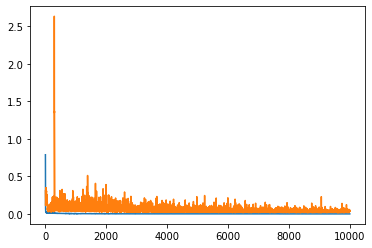

In [31]:
ax = plt.figure().add_subplot()
ax.plot(range(len(mean_squared_error)),mean_squared_error,label='train')
ax.plot(range(len(mean_squared_error)),val_mean_squared_error,label='val')

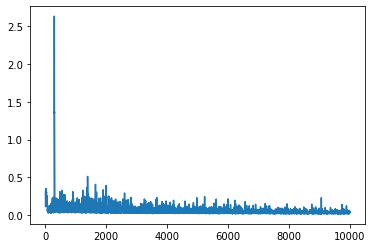

In [32]:
ax = plt.figure().add_subplot()
ax.plot(range(len(mean_squared_error)),val_mean_squared_error,label='val')

In [33]:
pre = model.predict(Xtest, batch_size=BATCH_SIZE)
print(pre)

[[0.342084   0.74959147 0.26588503]
 [0.5847478  0.18177202 0.1737025 ]
 [0.5510713  0.6839167  0.5860612 ]
 ...
 [0.53294295 0.07256849 0.17115046]
 [0.5796801  0.47795165 0.1719155 ]
 [0.7282367  0.87015486 0.75300914]]


In [78]:
ae=np.maximum(pre-Ytest,Ytest-pre)
# print(ae)
mae0=np.mean(ae[:,0])
mae1=np.mean(ae[:,1])
mae2=np.mean(ae[:,2])
mse0 = math.sqrt(mae0)
mse1 = math.sqrt(mae1)
mse2 = math.sqrt(mae2)
print("\nMAE0: {:.3f}, MAE1: {:.3f}, MAE2: {:.3f},".format(mae0, mae1,mae2))
print("\nMSE0: {:.3f}, MSE1: {:.3f}, MSE2: {:.3f},".format(mse0, mse1,mse2))



MAE0: 0.220, MAE1: 0.034, MAE2: 0.176,

MSE0: 0.469, MSE1: 0.184, MSE2: 0.419,


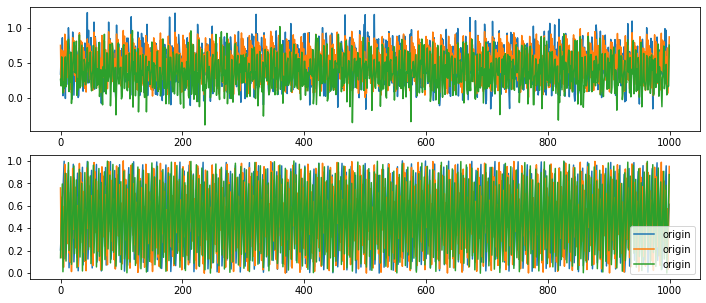

In [35]:
plt.figure(figsize=(12,5))
plt.subplot(211)
plt.plot(pre,label='predctions')
plt.subplot(212)
plt.plot(Ytest,label='origin')
plt.legend()
plt.show()

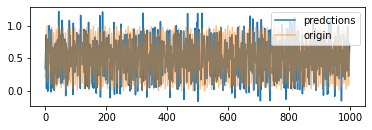

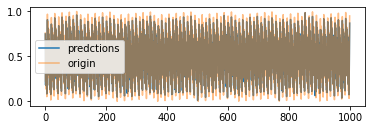

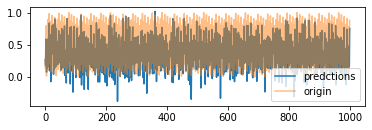

In [36]:
plt.figure(1)
plt.subplot(211)
plt.plot(pre[:,0],label='predctions',alpha=1)
plt.plot(Ytest[:,0],label='origin',alpha=0.5)
plt.legend(['predctions','origin'])

plt.figure(2)
plt.subplot(211)
plt.plot(pre[:,1],label='predctions',alpha=1)
plt.plot(Ytest[:,1],label='origin',alpha=0.5)
plt.legend()

plt.figure(3)
plt.subplot(211)
plt.plot(pre[:,2],label='predctions',alpha=1)
plt.plot(Ytest[:,2],label='origin',alpha=0.5)
plt.legend()
plt.show()

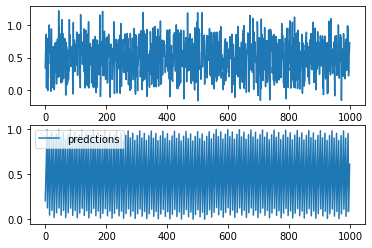

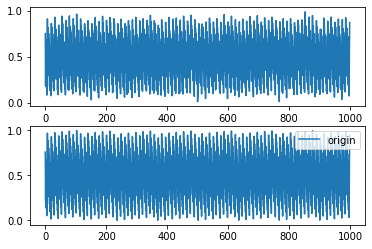

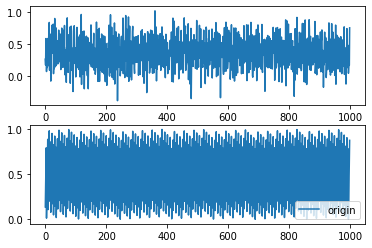

In [37]:
plt.figure(1)
plt.subplot(211)
plt.plot(pre[:,0],label='predctions')
plt.subplot(212)
plt.plot(Ytest[:,0],label='origin')
plt.legend(['predctions','origin'])

plt.figure(2)
plt.subplot(211)
plt.plot(pre[:,1],label='predctions')
plt.subplot(212)
plt.plot(Ytest[:,1],label='origin')
plt.legend()

plt.figure(3)
plt.subplot(211)
plt.plot(pre[:,2],label='predctions')
plt.subplot(212)
plt.plot(Ytest[:,2],label='origin')
plt.legend()
plt.show()

In [75]:
origin_Y = np.load('/home/chase/Boyka/Lyu/fac_cond256_unit8.npz')['fac'].astype(np.float64)
origin_Y_test=origin_Y[-1000:]
print(origin_Y_test)
pre_Y=np.zeros(origin_Y_test.shape)
pre_Y[:,0]=pre[:,0]*(y_max[0]-y_min[0])+y_min[0]
pre_Y[:,1]=pre[:,1]*(y_max[1]-y_min[1])+y_min[1]
pre_Y[:,2]=pre[:,2]*(y_max[2]-y_min[2])+y_min[2]
print(pre_Y)

[[1.828456 0.825891 0.00412 ]
 [2.354607 0.771756 0.010689]
 [2.880759 0.817621 0.017258]
 ...
 [2.401155 0.75331  0.013189]
 [2.927307 0.799175 0.019758]
 [3.453458 0.84504  0.026327]]
[[2.36898637 0.82495892 0.00797909]
 [3.33912611 0.76820368 0.00521482]
 [3.20449162 0.81839454 0.01758022]
 ...
 [3.13201666 0.75728846 0.00513829]
 [3.31886625 0.79780769 0.00516123]
 [3.91277695 0.83700955 0.02258649]]


In [76]:
ae=np.maximum(pre_Y-origin_Y_test,origin_Y_test-pre_Y)
print(ae)
mae0=np.mean(ae[:,0])
mae1=np.mean(ae[:,1])
mae2=np.mean(ae[:,2])
mse0 = math.sqrt(mae0)
mse1 = math.sqrt(mae1)
mse2 = math.sqrt(mae2)
print("\nMAE0: {:.3f}, MAE1: {:.3f}, MAE2: {:.3f},".format(mae0, mae1,mae2))
print("\nMSE0: {:.3f}, MSE1: {:.3f}, MSE2: {:.3f},".format(mse0, mse1,mse2))

[[5.40530368e-01 9.32079521e-04 3.85909405e-03]
 [9.84519110e-01 3.55232425e-03 5.47418311e-03]
 [3.23732615e-01 7.73541740e-04 3.22216751e-04]
 ...
 [7.30861659e-01 3.97845596e-03 8.05071128e-03]
 [3.91559253e-01 1.36730652e-03 1.45967700e-02]
 [4.59318947e-01 8.03045086e-03 3.74051463e-03]]

MAE0: 0.881, MAE1: 0.003, MAE2: 0.005,

MSE0: 0.938, MSE1: 0.058, MSE2: 0.073,


In [79]:
y_max[0]-y_min[0],y_max[1]-y_min[1],y_max[2]-y_min[2]


(3.9978760000000007, 0.09995299999999996)

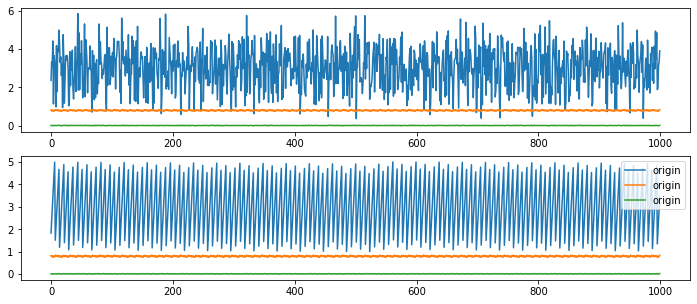

In [80]:
plt.figure(figsize=(12,5))
plt.subplot(211)
plt.plot(pre_Y,label='predctions')
plt.subplot(212)
plt.plot(origin_Y_test,label='origin')
plt.legend()
plt.show()

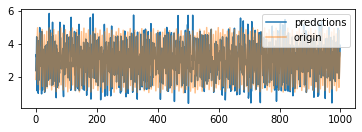

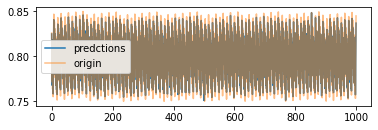

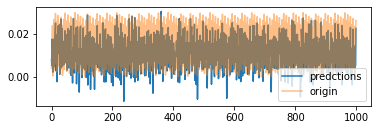

In [81]:
plt.figure(1)
plt.subplot(211)
plt.plot(pre_Y[:,0],label='predctions',alpha=1)
plt.plot(origin_Y_test[:,0],label='origin',alpha=0.5)
plt.legend(['predctions','origin'])

plt.figure(2)
plt.subplot(211)
plt.plot(pre_Y[:,1],label='predctions',alpha=1)
plt.plot(origin_Y_test[:,1],label='origin',alpha=0.5)
plt.legend()

plt.figure(3)
plt.subplot(211)
plt.plot(pre_Y[:,2],label='predctions',alpha=1)
plt.plot(origin_Y_test[:,2],label='origin',alpha=0.5)
plt.legend()
plt.show()